# LEAD SCORING CASE STUDY

# Problem Background

An online Executive Education firm recieves leads through:
- Its Website (Prospective students fill in their details)
- Student Referral (Current student provide the details of prospective students)

These leads are converted by the firm's sales teams that connects with these prospects through E Mail and Phone Calls. The success rate of lead conversion currently stands at 30%.

# Business Problem

The firm wants to its Sales Team to focus more on 'Hot Leads' - A term coined internally within the company that signifies the prospects that have relatively higher chances of conversion then others hence making the Sales Team more efficient investing resources in conversion of these 'Hot Leads' rather then spending time and energy on everyone.

# Deliverables Expected

<b>The firm has appointed us to:</b>
- Select most promising leads which can be classified as 'Hot Leads' and can be focussed better. For this, we have specifically been asked to:
    - Develop a Machine Learning Model to assign lead score to each of the leads such that the 'Hot Leads' are assigned higher score. The scoring has to be done on a scale of 0 to 100 with 0 being lowest and 100 being highest.
    - The threshold for lead conversion ratio has been targetted by CEO at least more then 80%. Hence, our model has to have over 80% accuracy rate.


# Importing Libraries and Loading Dataset

In [1]:
# Importing Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve


In [3]:
# Importing statsmodel libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
# Ignoring Warnings

import warnings
warnings.filterwarnings('ignore')


In [5]:
# Loading dataset

leads= pd.read_csv('Leads.csv')
leads.head(2)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


# Data Understanding

__We will look at only the basic understand of columns in this section__

In [6]:
# Shape of data

print(f'Dataset comprises of {leads.shape[0]} rows and {leads.shape[1]} columns.')


Dataset comprises of 9240 rows and 37 columns.


## Checking for duplicates

In [7]:

print(f'{len(leads[leads.duplicated()])} duplicates were found in given dataset.')


0 duplicates were found in given dataset.


## Observing Columns

In [8]:
# Using .info() function to get column wise overview of information

leads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<b>Observations: </b>

- <b>Prospect ID:</b> A unique ID to identify each customer. Its in alpha numeric type with special characters. `We will drop this column in upcoming sections since it is of no relevance in developing the model.`
- <b>Lead Number:</b> Assigned to each lead procured. Numeric Type column.
- <b>Lead origin:</b> The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc. The column has 5 distinct values: Landing Page Submission, API, Lead Add Form, Lead Import, Quick Add Form
- <b>Lead Source:</b> The source of the lead. Includes Google, Organic Search, Olark Chat, etc. The data is availed from 21 distinct sources. The column includes 36 null values too.
- <b>Do not Email:</b> An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not. This column is in boolean form in 'Yes'/ 'No'. The column is supposed to be of Boolean type with Yes or No responses. `However, over 92% of entire column has just No as response making the column redundant. Hence, we shall drop it in forthcoming sections.`
- <b>Do not Call:</b> An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not. This column is in boolean form in 'Yes'/ 'No'. The column is supposed to be of Boolean type with Yes or No responses. `However, over 99% of entire column has just No as response making the column redundant. Hence, we shall drop it in forthcoming sections.`
- <b>Converted:</b> This is our target variable. If lead has been coverted, it is depicted by 1 else as 0. No Null values found in this column.
- <b>Total Visits:</b> The total number of visits made by the customer on the website. The column contains null values. `This column is in float type - Will be converted to int type.`
- <b>Total Time Spent on Website:</b> The total time spent by the customer on the website. Units have not been indicated.
- <b>Page Views Per Visit:</b> Average number of pages on the website viewed during the visits. This column has presence of null values.
- <b>Last Activity:</b> Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc. Column is populated with 17 unique values and has null values.
- <b>Country:</b> The country of customer. It has 38 different countries and has high presence of null values.
- <b>Specialization:</b> The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form. The column has many null values and is populated with total 19 categories.
- <b>How did You Hear:</b> The source from which the customer heard about X Education. Has outliers and has 10 different categories.
- <b>What is your current occupation:</b> Indicates whether the customer is a student, umemployed or employed. Shows presence fo outliers with a total of 6 cateogies.
- <b>What matters most to you in choosing this course:</b> An option selected by the customer indicating what is their main motto behind doing this course. Shows null values presence and 3 distinct categories.
- <b>Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement and Through Recommendations:</b> Indicating whether the customer had seen the ad in any of the listed items. The column is supposed to be of Boolean type with Yes or No responses. `All these columns show a heavy skewness towards 'No' with over 99% entries in each column featuring No making it redundant. HEnce, these columns will be dropped in next step.`
- <b>Receive More Updates About Our Courses:</b> Indicates whether the customer chose to receive more updates about the courses. The column is supposed to have boolean values of yes or no, `however, entire column has only the No values featuring in entire column rendering it redundant. We shall drop the column in upcoming sections.`
- <b>Tags:</b> Tags assigned to customers indicating the current status of the lead. Heavily populated with Null Values with 26 distinct categories. It is a record of customer response.
- <b>Lead Quality:</b> Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead. Has many null values and 5 categories.
- <b>Update me on Supply Chain Content:</b> Indicates whether the customer wants updates on the Supply Chain Content. The column is supposed to be of Boolean type with Yes or No responses. `However, entire column has just No as response making the column redundant. Hence, we shall drop it in forthcoming sections.`
- <b>Get updates on DM Content:</b> Indicates whether the customer wants updates on the DM Content. The column is supposed to be of Boolean type with Yes or No responses. `However, entire column has just No as response making the column redundant. Hence, we shall drop it in forthcoming sections.`
- <b>Lead Profile:</b> A lead level assigned to each customer based on their profile. Has many null values and 6 categories of data.
- <b>City:</b> City of customer. Has null values and presence of data into 6 categories.
- <b>Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score:</b> An index and score assigned to each customer based on their activity and their profile
- <b>I agree to pay the amount through cheque:</b> Indicates whether the customer has agreed to pay the amount through cheque or not. The column is supposed to be of Boolean type with Yes or No responses. `However, entire column has just No as response making the column redundant. Hence, we shall drop it in forthcoming sections.`
- <b>a free copy of Mastering The Interview:</b> Indicates whether the customer wants a free copy of 'Mastering the Interview' or not. `This is a boolean type of column with Yes and No values and will be converted to 1 and 0 respectively.`
- <b>Last notable activity:</b> The last notable activity performed by the student. No presence of null values with categories distributed across 16 values.

### We will now drop the columns as prescribed in above explanation based on shared logic

In [9]:
# Preparing a list of column names to be dropped:

col_to_drop= ['Prospect ID', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
              'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
             'Do Not Call', 'Do Not Email', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
              'Newspaper', 'Digital Advertisement', 'Through Recommendations']

# Dropping columns:

leads= leads[[i for i in leads.columns if i not in col_to_drop]]
leads.head(2)


,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Select,...,Better Career Prospects,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,...,Better Career Prospects,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,Email Opened


### Mapping "Yes" and "No" to 1 and 0 respectively based on logic shared in observations section

In [10]:
# Mapping "Yes" to 1 and "No" to 0 in all boolean columns of dataset

for i in leads.select_dtypes(include= 'object').columns:
    if leads[i].nunique()== 2:
        leads[i]= leads[i].map({'Yes': 1, 'No': 0})

#Re-inspecting the dataframe
leads.head(2)        


,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Select,...,Better Career Prospects,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,...,Better Career Prospects,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,Email Opened


### Basic Statistical Evaluation of columns

In [11]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<b>Observations:</b>
- 7 columns have numerical type data and are shown in above table
- Possible outliers observed in:
    - TotalVisits
    - Total Time Spent on Website, Page Views Per Visit

# Data Cleaning and Feature Engineering

__In this section, we have merged Data Visualization and Data Cleaning together. In the initial phases, we clean the data while visually verifying our results and later will move onto the process of Univariate, Bivariate and Multivariate Analysis of EDA to highlight some of the important learnings.__

## Null Value Handling

In [12]:
# Checking for presence of null values in our data:

print(f'Our data currently has presence of {sum(leads.isna().sum())} null values.')


Our data currently has presence of 41039 null values.


__While sampling the data randomly, we came across 'Select' in many of the columns. These in highest probability are the entries that have been updated since none of the given categories were selected by the person entering data__

Hence, we will convert such entries into Null Values and treat them accordingly.

In [13]:
# Identifying 'Select' in columns

for i in leads.columns:
    if 'Select' in leads[i].unique():
        print(i, 'has', len(leads[leads[i]== 'Select']), 'entries as "Select".')
        

Specialization has 1942 entries as "Select".
How did you hear about X Education has 5043 entries as "Select".
Lead Profile has 4146 entries as "Select".
City has 2249 entries as "Select".


__From above we see considerable number of columns are mentioned as 'Select' in our dataframe. Replacing these entries with Null__

In [14]:
# Converting Select to null value
leads = leads.replace('Select', np.nan)

# Rechecking for 'Select' in columns
for i in leads.columns:
    if 'Select' in leads[i].unique():
        print(i, 'has', len(leads[leads[i]== 'Select']), 'entries as "Select".')
else:
    print('None Found')


None Found


<b>Observations:</b>
- All such entries with "Select" have been handled and have been converted to Null Values

### Null Value Dataframe

In [15]:
# Preparing Null Values Dataframe that shows featurewise percentage of null values present in our data:

# Defining list
na_cols= []
na_col_val= []

# Iteration loop
for i in leads.columns:
    if leads[i].isna().sum() > 1:
        na_cols.append(i)
        na_col_val.append((leads[i].isna().sum()/ len(leads))*100)

# Designing and Developing dataframe
na_df= pd.DataFrame()
na_df['Column']= na_cols
na_df['Null Value Percentage']= na_col_val
na_df= na_df.sort_values(by= 'Null Value Percentage', ascending= False)

# Printing dataframe
na_df
        

,Column,Null Value Percentage
6,How did you hear about X Education,78.463203
11,Lead Profile,74.188312
10,Lead Quality,51.590909
16,Asymmetrique Profile Score,45.649351
15,Asymmetrique Activity Score,45.649351
14,Asymmetrique Profile Index,45.649351
13,Asymmetrique Activity Index,45.649351
12,City,39.707792
5,Specialization,36.580087
9,Tags,36.287879


<b>Observations:</b>
- Extreme null values found in few of the columns.
- We will handle all these null values after scruitinizing them one by one in upcoming parts of this section

### Null Value Plotting

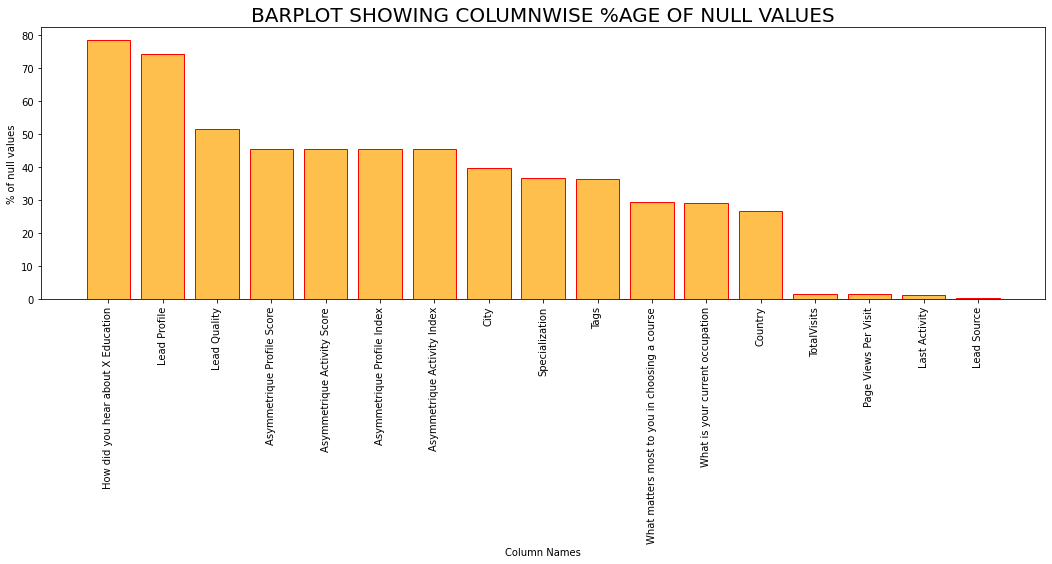

In [16]:
# Defining Figure
plt.figure(figsize= (18, 5))

# Plotting the bragraph
plt.bar(x= na_df['Column'], height= na_df['Null Value Percentage'], color= (1, 0.647, 0, 0.7), edgecolor= 'red')

# Setting aesthetics
plt.title('barplot showing columnwise %age of null values'.upper(), fontsize= 20)
plt.ylabel('% of null values')
plt.xlabel('Column Names')
plt.xticks(rotation= 90)

plt.show()

<b>Observations:</b>
- `How do you hear about X education` and `Lead Profile` have high occurance of null values (In Excess of 70%). Due to unusually high Null Values, these columns will be dropped.

<b>We will go through all columns showing presence of Null values one by one to ascertain the next course of action to address them in rest of this subsection</b>

__Dropping 'How do you hear about X education' and 'Lead Profile' columns__

In [17]:
# Dropping indicated columns:

leads.drop(labels= ['How did you hear about X Education', 'Lead Profile'], axis= 1, inplace= True)


### Handling Rest of the Null Values

#### Column: Lead Quality

With presence of over 50% null values, prima facie, the column seems to be useless. However, the column does hold importance in model building since it provides us one of the important features that will help us in developing a robust model. Hence,we will scrutinize this variable closely before dropping it. We will use visualizations to establish next course of action.

We will show 2 plots side by side depicting the conversion ratio of leads in each of the Lead Quality categories. One plot will be based on actual dataframe and other will be developed based on dataframe where null values are imputed with a category called 'Unknown'. Based on visualization, we will determine further strategy.

In [18]:
# Creating a deep copy of our main dataframe
leads1= leads.copy(deep= True)
leads1['Lead Quality']= leads1['Lead Quality'].fillna('Not Sure')

# Building dataframe of lead conversion ratio based on Lead Quality for data including null values:

lead_quality_compare= pd.DataFrame(index= leads.groupby(by= 'Lead Quality').count().index)
lead_quality_compare['Total Count']= leads.groupby(by= 'Lead Quality').count()['Converted'].values
lead_quality_compare['Conversion Count']= leads.groupby(by= 'Lead Quality').sum()['Converted'].values
lead_quality_compare['Conversion Ratio']= round((lead_quality_compare['Conversion Count']/lead_quality_compare['Total Count'])*100, 2)

# Building another dataframe of lead conversion ratio based on Lead Quality for data after imputing null values with 'Unknown':

lead_quality_compare1= pd.DataFrame(index= leads1.groupby(by= 'Lead Quality').count().index)
lead_quality_compare1['Total Count']= leads1.groupby(by= 'Lead Quality').count()['Converted'].values
lead_quality_compare1['Conversion Count']= leads1.groupby(by= 'Lead Quality').sum()['Converted'].values
lead_quality_compare1['Conversion Ratio']= round((lead_quality_compare1['Conversion Count']/lead_quality_compare1['Total Count'])*100, 2)

print('With Null Values:\n', lead_quality_compare)
print()
print()
print('Data post imputing null values with "Unknown":\n', lead_quality_compare1)


With Null Values:
                    Total Count  Conversion Count  Conversion Ratio
Lead Quality                                                      
High in Relevance          637               603             94.66
Low in Relevance           583               477             81.82
Might be                  1560              1179             75.58
Not Sure                  1092               266             24.36
Worst                      601                12              2.00


Data post imputing null values with "Unknown":
                    Total Count  Conversion Count  Conversion Ratio
Lead Quality                                                      
High in Relevance          637               603             94.66
Low in Relevance           583               477             81.82
Might be                  1560              1179             75.58
Not Sure                  5859              1290             22.02
Worst                      601                12            

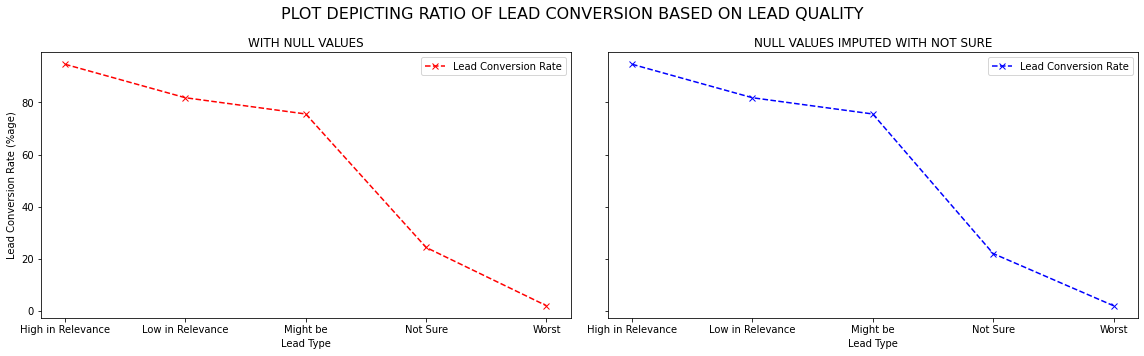

In [19]:
# Developing Visualization:

fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (16, 5), sharey= True)
plt.suptitle('plot depicting ratio of lead conversion based on lead quality'.upper(), fontsize= 16)

ax[0].plot(lead_quality_compare['Conversion Ratio'], 'r--x', label= 'Lead Conversion Rate')
ax[0].set_title('with null values'.upper(), fontsize= 12)
ax[0].set_xlabel('Lead Type')
ax[0].set_ylabel('Lead Conversion Rate (%age)')
ax[0].legend()

ax[1].plot(lead_quality_compare1['Conversion Ratio'], 'b--x', label= 'Lead Conversion Rate')
ax[1].set_title('null values imputed with not sure'.upper(), fontsize= 12)
ax[1].set_xlabel('Lead Type')
ax[1].set_ylabel('')
ax[1].legend()

plt.tight_layout()
plt.show()


<b>Observations:</b>
- The plot seems to depict the conversion ratio in line with the intuition of name of lead type
- "High in relevance" and "Low in Relevance" have extremely high conversion rate (~ 80% conversion) and Worst leads have lowest conversion rate.
    - `It suggests despite high number of null values, the variable could be a strong possible feature to be included in our model's development.`
- We notice from above plots that the structure of our plot remains similar whether we impute conversion rate for 'Not Sure' and 'Unknown' is almost similar whether we plot them without null values or whether we plot them after imputing 'Not Sure' in place of null values.
- Despite imputing a high number of values as 'Not Sure', the converation ratio of 'Not Sure' category remains similar.
- Hence, based on above visualizations, we conclude if we merge 'Not Sure' and 'Unknown' together, we will:
    - Be able to use a strong feature in our modelling
    - Be able to manage reducing one level of category with minimum possible compromise on quality of data

<b>Imputing null values with 'Not Sure' in our original dataframe based on above logic.</b>

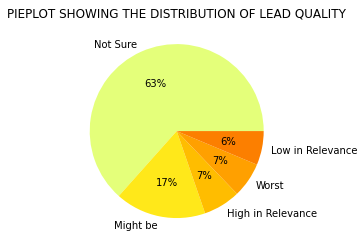

In [20]:
# Imputing Null Values with 'Unknown'
leads['Lead Quality']= leads['Lead Quality'].fillna('Not Sure')

# Plot depicting distribution of category levels in Lead Quality feature:

# Pie plot using Pandas
leads['Lead Quality'].value_counts().plot.pie(autopct= '%.0f%%', cmap= 'Wistia')

# Setting Plot aesthetics
plt.title('pieplot showing the distribution of lead quality'.upper())
plt.ylabel('')

plt.show()


<b>Observations:</b>
- Post our imputations, 'Not Sure' has become the mode of this feature.
- Only 7% of the leads are 'High in relevance', however, extremely high conversion rates.

#### Columns: Asymmetrique Activity Index, Asymmetrique Activity Score, Asymmetrique Profile Index, Asymmetrique Profile Score

<b>These columns are found to have exactly same number of missing values.</b>

In [21]:
# Extracting Dataframe comprising these 4 columns and merging with target variable column:

asymmetrique_scores= leads[[i for i in leads.columns if 'Asymmetrique' in i]]
asymmetrique_scores['Converted']= leads['Converted']


In [22]:
# Checking if data is missing in corresponding rows of all columns:

asymmetrique_scores.sample(20)


,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Converted
5814,NaN,NaN,NaN,NaN,0
1484,02.Medium,01.High,13.0,17.0,0
8689,02.Medium,02.Medium,14.0,15.0,0
6352,NaN,NaN,NaN,NaN,0
8063,02.Medium,01.High,14.0,19.0,1
3948,NaN,NaN,NaN,NaN,0
7623,01.High,02.Medium,17.0,15.0,0
4405,02.Medium,02.Medium,15.0,15.0,0
3705,NaN,NaN,NaN,NaN,0
874,01.High,02.Medium,16.0,16.0,1


<b>Observations:</b>
- From above, it is evident that values are not missing at random. Values in all 4 columns are missing in corresponding rows.
- These could be the cases where possibly the profiling of students has not been done yet.

__Although due to high rate of missing values it would have been advisable to drop the column completely, however, we still scrutinize the columns from these 4 features before dropping them off.__

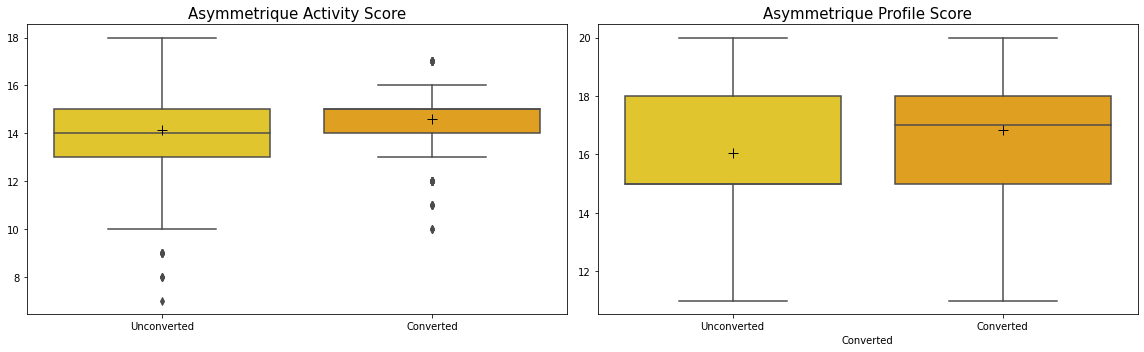

In [23]:
# Boxplotting of continuous variblaes

# Defining figure
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (16,5))

# Creating boxplot 1
sns.boxplot(x= 'Converted', y= 'Asymmetrique Activity Score', data= asymmetrique_scores, ax= ax[0], palette= 'Wistia', 
            showmeans= True, meanprops= {'marker': '+', 'markeredgecolor': 'black', 'markersize': 10})

# Setting aesthetics for boxplot 1
ax[0].set_title('Asymmetrique Activity Score', fontsize= 15)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xticklabels(['Unconverted', 'Converted'])

# Creating boxplot 2
sns.boxplot(x= 'Converted', y= 'Asymmetrique Profile Score', data= asymmetrique_scores, ax= ax[1], palette= 'Wistia',
           showmeans= True, meanprops= {'marker': '+', 'markeredgecolor': 'black', 'markersize': 10})

# Setting aesthetics for boxplot 2
ax[1].set_title('Asymmetrique Profile Score', fontsize= 15)
ax[1].set_ylabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(['Unconverted', 'Converted'])

plt.tight_layout()
plt.show()


<b>Observations:</b>
- Pattern seems to exist in Asymmetrique Activity Score with the ones being converted showing a relatively higher score. The median value seems to be overlapped by 75th percentile too
- For Asymmetrique Profile Score, median score of non conversion coincides with the 25th percentile.
- Mean value of converted customers are marginally higher then unconverted customers for both these features. 
- These scores are based on their respective index. Hence, we first handle the "basis" - that is the index of these scores

__Based on above, despite the column having high number opf null values, we will retain it currently and will drop it at a later stage based on the need.__

<b>In order to retain Asymmetrique Activity Index and Asymmetrique Profile Index Features:</b>
- We first convert missing values to 'Unknown'
- We then convert values featuring in Asymmetrique Activity Index and Asymmetrique Profile Index from alpha numeric to text values (Removing the numeric characters from beginning of each entry).

In [24]:

# Imputing null values with 'Unknown':
asymmetrique_scores[['Asymmetrique Activity Index', 'Asymmetrique Profile Index']]= asymmetrique_scores[['Asymmetrique Activity Index', 'Asymmetrique Profile Index']].fillna('Unknown')

# Feature Engineering the text inside column into text format from alpha-numeric
asymmetrique_scores['Asymmetrique Activity Index'] = asymmetrique_scores['Asymmetrique Activity Index'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))
asymmetrique_scores['Asymmetrique Profile Index'] = asymmetrique_scores['Asymmetrique Profile Index'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))


<b>`Since Asymmetrique Activity Score is dependent on Asymmetrique Activity Index and Asymmetrique Profile Score is dependent on Asymmetrique Profile Index, we will drop both these scores from our main dataframe of Leads. We will retain the imputed columns of both indices in main dataframe.`</b>

In [25]:
# Replacing indices in main dataframe with treated indices (Existing in asymmetrique_scores dataframe)

leads['Asymmetrique Activity Index']= asymmetrique_scores['Asymmetrique Activity Index']
leads['Asymmetrique Profile Index']= asymmetrique_scores['Asymmetrique Profile Index']


In [26]:
# Dropping both columns with Asymmetric Scores from our main dataframe:

leads.drop(labels= ['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis= 1, inplace= True)


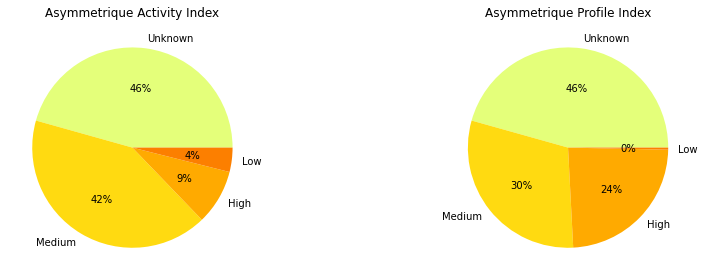

In [27]:
# Checking the spread of categories in both these categories:

# Defining the plot
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (14, 4))

# Developing pie plots using pandas
leads['Asymmetrique Activity Index'].value_counts().plot.pie(autopct= '%.0f%%', ax= ax[0], cmap= 'Wistia') # Plot 1
leads['Asymmetrique Profile Index'].value_counts().plot.pie(autopct= '%.0f%%', ax= ax[1], cmap= 'Wistia')  # Plot 2

# Setting aesthetics of plot 1
ax[0].set_title('Asymmetrique Activity Index')
ax[0].set_ylabel('')

# Setting aesthetics of plot 2
ax[1].set_title('Asymmetrique Profile Index')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()


<b>Observations:</b>
- Since we imputd a large number of entries (Null values) as 'Unknown', it turned out to have the highest share.

#### Column: City

This column has close to 40% missing values

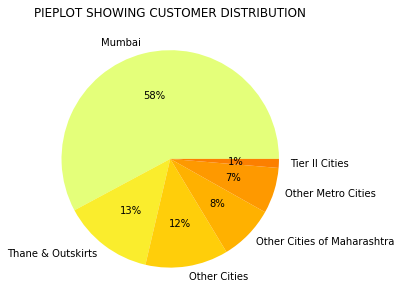

In [28]:

# Defining figure
plt.figure(figsize= (5,5))

# Developing plieplot using pandas
leads['City'].value_counts().plot.pie(autopct='%1.0f%%',cmap= 'Wistia')

# Setting aesthetics
plt.title('pieplot showing customer distribution'.upper())
plt.ylabel('')

plt.show()


<b>Observations:</b>
- Although the chart above shows an important insight that close to 60% of the customers are from Mumbai, this tends to skew our observations towards a specific geographical area. The reason could possibly be:
    - The data is from the firm's Mumbai operations and sales team: In such a case, our analysis will get skewed
    - The firm is primarily operating in western India region which is highly unlikely. With a boom in EdTech industry, the companies are omnipresent in the country and outside the country.
    
<b>Hence, to avoid unnecessary skew in our model and ambiguity, we will drop this column as well. </b>

In [29]:
# Dropping City feature:

leads.drop(labels= 'City', axis= 1, inplace= True)


#### Column: Specialization

In [30]:
print('Specialization column has', str(round(len(leads[leads['Specialization'].isna()])/len(leads)*100, 2))+'% null values.')

Specialization column has 36.58% null values.


This feature refers to the industry domain in which the customer worked before. While imputing 'Select' with np.Nan, all entries with 'Select' were replaced with Null values. Hence, these Null values are not missing completely at random. We will impute 'Undisclosed' in null values.

In [31]:

# Imputing null vbalues with 'Undisclosed':
leads['Specialization']= leads['Specialization'].fillna('Undisclosed')


In [32]:

# Checking value counts:
leads['Specialization'].value_counts()


Undisclosed                          3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

<b>Observations:</b>
- The imputation has resulted in a major part of our column to have 'Undisclosed' category

#### Column: Tags

This column keeps a track of status of lead as updated by Sales Team

In [33]:
print(str(round(leads['Tags'].isna().sum()/len(leads)*100))+'% of data is found to be missing in this column.')

36% of data is found to be missing in this column.


It could be possible that the data is missing since status of lead has not been updated by sales person due to various reasons such as:
- Sales person would have left the organization without giving a proper handover
- The status is yet to be updated
- The lead would have materialized

<b>Imputing 'Not Updated' in missing values</b>

In [34]:
# Imputing 'Not Updated' in missing data rows of Tags column

leads['Tags']=leads['Tags'].fillna('Not Updated')


In [35]:
# A brief look on column:

leads['Tags'].value_counts()


Not Updated                                          3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

<b>Observations:</b>
- 36% of the column values (Null values) are now imputed as 'Not updated'
- Multiple categories were found to be identical and hence could be merged together to make the column more efficient for later analysis and modelling.
- Our aim will be to abridge the number of Tags to much smaller number so that they are easier to handle preferably in 3 categories viz lost, ongoing and unreachable based on sales status.

In [36]:
# Checking conversion status against every Tag using a dataframe:

# Defining Dataframe
tag= pd.DataFrame()

# Updating data:
tag['Status']= leads.groupby(by= 'Tags').sum().index
tag['Total Leads']= leads.groupby(by= 'Tags').count()['Converted'].values
tag['Converted Leads']= leads.groupby(by= 'Tags').sum()['Converted'].values
tag['Conversion Percent']= round((tag['Converted Leads']/tag['Total Leads'])*100, 2)

# Sorting dataframe
tag= tag.sort_values(by= 'Conversion Percent', ascending= False)

tag


,Status,Total Leads,Converted Leads,Conversion Percent
7,Interested in Next batch,5,5,100.00
9,Lateral student,3,3,100.00
2,Closed by Horizzon,358,356,99.44
10,Lost to EINS,175,171,97.71
20,Will revert after reading the email,2072,2007,96.86
1,Busy,186,105,56.45
16,Shall take in the next coming month,2,1,50.00
19,Want to take admission but has financial problems,6,2,33.33
21,in touch with EINS,12,3,25.00
12,Not Updated,3353,836,24.93


<b>Observations:</b>
- Based on above, we get better clarity on sales status. This gives a better opportunity for us to re-categorize these variables in smaller number fo categories. In order to decrease model complexity, we shall reduce the number of variables in this feature based on sales status updates (Tags):
    - `Closed`:
        - Interested in Next batch
        - Lateral student
        - Closed by Horizzon
        - Lost to EINS
        - Will revert after reading the email
    - `Ongoing`:
        - Shall take in the next coming month
        - Want to take admission but has financial problems
        - in touch with EINS
        - In confusion whether part time or DLP
        - Still Thinking
        - Graduation in progress
        - Interested in full time MBA
        - Interested in other courses
    - `Unable to Reach`:
        - Busy
        - opp hangup
        - Ringing
        - switched off
        - invalid number
        - number not provided
        - wrong number given
    - `Not Updated`:
        - Not Updated
    - `Lost`:
        - Diploma holder (Not Eligible)
        - Not doing further education
        - Already a student
        - University not recognized
        - Recognition issue (DEC approval)
        - Lost to Others

In [37]:

# Creating a dictionary to impute:
closure_prob_dict= {'Closed':['Interested in Next batch', 'Lateral student', 'Closed by Horizzon', 'Lost to EINS',
                              'Will revert after reading the email'],
                    'Ongoing':['Shall take in the next coming month', 'Want to take admission but has financial problems',
                               'in touch with EINS', 'In confusion whether part time or DLP', 'Still Thinking',
                               'Graduation in progress', 'Interested in full time MBA', 'Interested in other courses'],
                    'Unable to Reach': ['Busy', 'opp hangup', 'Ringing', 'switched off', 'invalid number', 'number not provided',
                                        'wrong number given'],
                    'Not Updated': ['Not Updated'],
                    'Lost': ['Diploma holder (Not Eligible)', 'Not doing further education', 'Already a student',
                             'University not recognized', 'Recognition issue (DEC approval)', 'Lost to Others']}

# Defining a function:
def handle_tags(text):
    for i in closure_prob_dict:
        if text in closure_prob_dict[i]:
            return i

# Imputing values from dictionary:
leads['Tags']= leads['Tags'].apply(handle_tags)


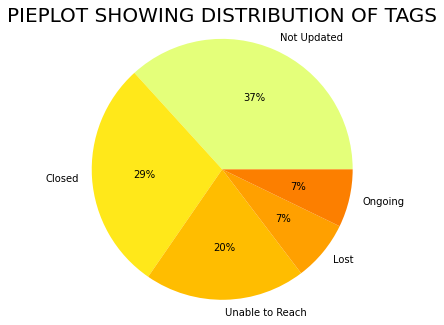

In [38]:
# Inspecting the column using pieplot to check the category distribution:

# Developing plot using pandas
leads['Tags'].value_counts().plot.pie(autopct= '%.0f%%', cmap= 'Wistia', radius= 1.5)

# Setting aesthetics:
plt.title('pieplot showing distribution of tags'.upper(), y= 1.15, fontweight= 10, fontsize= 20)
plt.ylabel('')

plt.show()


<b>Observations:</b>
- 29% of the leads are under closed status
- A large chunk of values were not updated by sales team (37%)
- Sales team is unable to contact 20% of the leads.
- 7% of the leads are either lost or ongoing.

<b>Checking leads conversion status by Tag</b>

In [39]:

# Defining a dataframe
tag= pd.DataFrame()

# Updating data:
tag['Tags']= leads.groupby(by= 'Tags').sum().index
tag['Total Leads']= leads.groupby(by= 'Tags').count()['Converted'].values
tag['Converted Leads']= leads.groupby(by= 'Tags').sum()['Converted'].values
tag['Conversion Percent']= round((tag['Converted Leads']/tag['Total Leads'])*100, 2)

# Sorting dataframe based on conversion percentage
tag= tag.sort_values(by= 'Conversion Percent', ascending= False)

tag


,Tags,Total Leads,Converted Leads,Conversion Percent
0,Closed,2613,2542,97.28
2,Not Updated,3353,836,24.93
4,Unable to Reach,1819,147,8.08
3,Ongoing,655,28,4.27
1,Lost,683,5,0.73


<b>Observations:</b>
- Tags with 'Closed' status have highest %age conversion rate
- Tags with 'Lost' status have lowest %age conversion rate

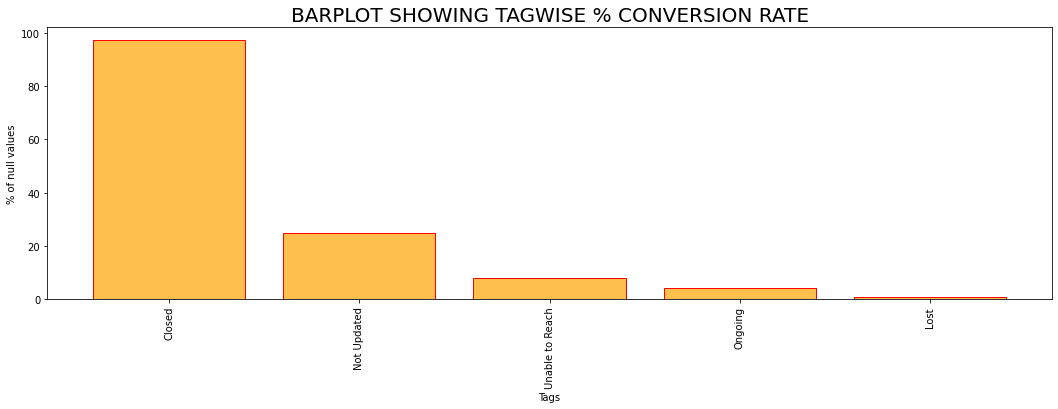

In [40]:
# Defining Figure
plt.figure(figsize= (18, 5))

# Plotting the bragraph
plt.bar(x= tag['Tags'], height= tag['Conversion Percent'], color= (1, 0.647, 0, 0.7), edgecolor= 'red')

# Setting aesthetics
plt.title('barplot showing tagwise % conversion rate'.upper(), fontsize= 20)
plt.ylabel('% of null values')
plt.xlabel('Tags')
plt.xticks(rotation= 90)

plt.show()


#### Column: What matters most to you in choosing a course

In [41]:
# Observing missing values:

print(str(round(leads['What matters most to you in choosing a course'].isna().sum()/len(leads)*100))+'% of data is found to be missing in this column.')


29% of data is found to be missing in this column.


In [42]:
# Observing column contents:

leads['What matters most to you in choosing a course'].value_counts()


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

<b>Observations:</b>
- 70% of the data is recorded under value 'Better career prospects' and 29% is missing.

<b>Based on above, we conclude the feature to be redundant to be used in model development. Hence, dropping this feature.</b>

In [43]:
leads.drop(labels= ['What matters most to you in choosing a course'], axis= 1, inplace= True)

#### Column: What is your current occupation

According to given data dictionary, the column has student, umemployed or employed categories

Imputing 'Undisclosed' as missing values in this column

In [44]:
# Observing the number of 

print(str(round(leads['What is your current occupation'].isna().sum()/len(leads)*100))+'% of data is found to be missing in this column.')


29% of data is found to be missing in this column.


In [45]:
# Missing value treatment - Imputing with 'Undisclosed'

leads['What is your current occupation']= leads['What is your current occupation'].fillna('Undisclosed')


In [46]:
# Quick glance of column:

leads['What is your current occupation'].value_counts()


Unemployed              5600
Undisclosed             2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

<b>Observations:</b>
- The column was supposed to have just Employed, Unemployed and Student categories.
- Null values were converted to Undisclosed hence it has a heavy prevalence.
- Merging Working Professional, Businessman and Other as 'Employed'
- Merging Housewife to Unemployed

In [47]:
# Mergining Housewife to Unemployed
leads['What is your current occupation']= leads['What is your current occupation'].replace('Housewife', 'Unemployed')

# Merging Working Professional, Businessman and Other as 'Employed'
leads['What is your current occupation']= leads['What is your current occupation'].apply(lambda x: 'Employed' 
                                               if x in ['Working Professional', 'Businessman', 'Other'] else x)


In [48]:
# Since column name is too complicated, we will simplify it:

# Creating column names list:
col_name= []
for i in leads.columns:
    if i == 'What is your current occupation':
        col_name.append('Current Occupation')
    else:
        col_name.append(i)

leads.columns= col_name


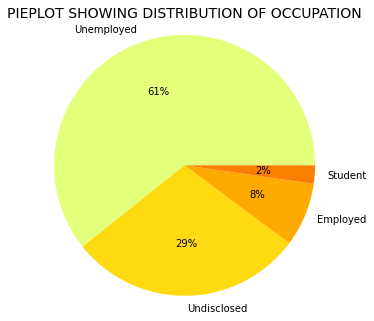

In [49]:
# Rechecking the Column using pieplot:

# Developing plot using pandas
leads['Current Occupation'].value_counts().plot.pie(autopct= '%.0f%%', cmap= 'Wistia', radius= 1.5)

# Setting aesthetics:
plt.title('pieplot showing distribution of occupation'.upper(), y= 1.15, fontsize= 14)
plt.ylabel('')

plt.show()


<b>Observations:</b>
- Unemployed people form the largest chunk of leads
- A large part of leads have opted not to disclose their occupation

#### Column: Country

In [50]:
print(str(round(leads['Country'].isna().sum()/len(leads)*100))+'% of data is found to be missing in this column.')

27% of data is found to be missing in this column.


In [51]:
# Quick look:

leads['Country'].value_counts()


India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
China                      2
Ghana                      2
Belgium                    2
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Bangladesh                 2
Netherlands                2
Italy                      2
Liberia                    1
Switzerland                1
Tanzania                   1
Sri Lanka                  1
Russia                     1
Denmark                    1
Vietnam       

<b>Observations:</b>
- A quick look at data reveals that a majority of entries are fom India (70%)
- We can't impute mode value to null values since this will imply having close to 97% data from India making this variable redundant.
- Instead, we will impute the missing values with 'unknown'. Note that we already have unknown in existing categories.
- Since column is dominated by 'India' and 'unknown' and rest of categories have miniscule values, we will change all other countries as 'Others'. This way, we will have 3 categories.

In [52]:
# Imputing 'unknown' in place of missing values:

leads['Country']= leads['Country'].fillna('unknown')


# Imputing 'Others' in values other then India and Unknown:

leads['Country']= leads['Country'].apply(lambda x: 'Others' if x not in ['India', 'unknown'] else x)


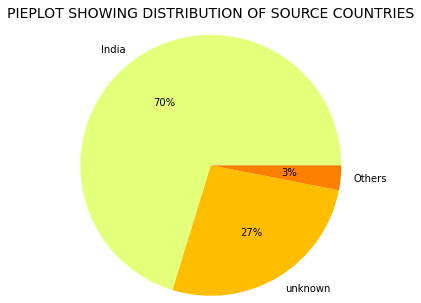

In [53]:
# Rechecking Column using pieplot:

# Developing plot using pandas
leads['Country'].value_counts().plot.pie(autopct= '%.0f%%', cmap= 'Wistia', radius= 1.5)

# Setting aesthetics:
plt.title('pieplot showing distribution of source countries'.upper(), y= 1.15, fontsize= 14)
plt.ylabel('')

plt.show()


<b>Observations:</b>
- Maximum throughput has come in from India.

#### Columns: TotalVisits, Page Views Per Visit, Last Activity, Lead Source

In [54]:
# Treating columns with lesser number of Null Values:

# Preparing a list of columns to be treated for null values:
minor_na= leads[['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source']]

# Imputing Mode and Median to Object and Numeric/ Float columns respectively:
for i in minor_na.columns:
    if minor_na[i].dtype== 'O':
        leads[i]= leads[i].fillna(leads[i].mode()[0])
    else:
        leads[i]= leads[i].fillna(leads[i].median())


In [55]:
# Rechecking the columns for null values:

leads[['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source']].isna().sum()


TotalVisits             0
Page Views Per Visit    0
Last Activity           0
Lead Source             0
dtype: int64

#### Column: Lead Source

In [56]:
# Quick Column Inspection:

leads['Lead Source'].value_counts()


Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
NC_EDM                  1
blog                    1
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

<b>Observations:</b>
- In order to make this feature more useful, some of the values can be merged together:
    - Welingak website, WeLearn, NC_EDM, testone, Click2Call, welearnblog_Home and WeLearn will be merged together since they all seem to be referral channels.
    - Live Chat can be merged with Olark Chat and entire category can be re-labelled as chat
    - Press Release to be merged with Direct Traffic
    - Google and google to be merged together - Pay per Click Ads to be added to this category also
    - Facebook, bing, youtubechannel, blog to be merged in Social Media
    

In [57]:
leads['Lead Source']= leads['Lead Source'].replace('welearnblog_Home', 'WeLearn')
leads['Lead Source']= leads['Lead Source'].replace('google', 'Google')
leads['Lead Source']= leads['Lead Source'].replace('Pay per Click Ads', 'Google')
leads['Lead Source']= leads['Lead Source'].replace('Facebook', 'Social Media')
leads['Lead Source']= leads['Lead Source'].replace('bing', 'Social Media')
leads['Lead Source']= leads['Lead Source'].replace('youtubechannel', 'Social Media')
leads['Lead Source']= leads['Lead Source'].replace('blog', 'Social Media')
leads['Lead Source']= leads['Lead Source'].replace('Welingak Website', 'Referral Sites')
leads['Lead Source']= leads['Lead Source'].replace('WeLearn', 'Referral Sites')
leads['Lead Source']= leads['Lead Source'].replace('NC_EDM', 'Referral Sites')
leads['Lead Source']= leads['Lead Source'].replace('testone', 'Referral Sites')
leads['Lead Source']= leads['Lead Source'].replace('Click2call', 'Referral Sites')
leads['Lead Source']= leads['Lead Source'].replace('Live Chat', 'Chat')
leads['Lead Source']= leads['Lead Source'].replace('Olark Chat', 'Chat')
leads['Lead Source']= leads['Lead Source'].replace('Press_Release', 'Direct Traffic')

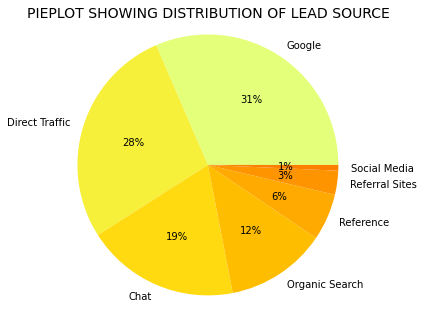

In [58]:
# Rechecking the column using pieplot()

# Developing plot using pandas
leads['Lead Source'].value_counts().plot.pie(autopct= '%.0f%%', cmap= 'Wistia', radius= 1.5)

# Setting aesthetics:
plt.title('pieplot showing distribution of lead source'.upper(), y= 1.15, fontsize= 14)
plt.ylabel('')

plt.show()


#### Column: Last Notable Activity

As per data dictionary, the last notable acitivity performed by the student is recorded in this section.

Contents of this column were thoroughly investigated and it was found to be duplication of 'Last Activity' column.

In [59]:
# Checking how many of the corresponding rows in both columns have same data

len(leads[leads['Last Activity']==leads['Last Notable Activity']])


5833

<b>Observation:</b>
- 5833 entries in same row were equal in these 2 columns which amounts to roughly around 63% of the data which matches exactly between these 2 columns

In [60]:
# Checking values in 'Last Notable Activity' where corresponding data in 'Last Activity' is not same:

leads[leads['Last Activity'] != leads['Last Notable Activity']]['Last Notable Activity'].value_counts()


Modified    3407
Name: Last Notable Activity, dtype: int64

<b>Observations:</b>
- From above, we conclude wherever corresponding entries in column 'Last Notable Activity' is not same same as 'Last Activity', the entry has a common value 'Modified' in earlier.

Based on above 2 arguments, e conclude the columns are duplication of each other and since more valueable information is available in 'Last Activity' we retain it, and we drop 'Last Notable Activity'

In [61]:
# Dropping the column:

leads.drop(labels= 'Last Notable Activity', axis= 1, inplace= True)


<b> Rechecking the dataframe

In [62]:
leads.head(2)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current Occupation,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index
0,660737,API,Chat,0,0.0,0,0.0,Page Visited on Website,unknown,Undisclosed,Unemployed,Ongoing,Low in Relevance,Medium,Medium
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Undisclosed,Unemployed,Unable to Reach,Not Sure,Medium,Medium


# Exploratory Data Analysis

<b>This section is dedicated to explore the data visually to derive important insights which will be helpful in model building, conclusions and business recommendations. This section is divided in 3 distinct sections:</b>
- Univariate Analysis: Study of each of the single variables
- Bivariate Analysis: Study of each of the variable pairs
- Multivariate Analysis: Study of 3 or more variables for relative relations

In [63]:
# Creating 2 variable lists based on variable types to be used in this section for analysis:

# List of Continuous Variables
cont_var= [i for i in leads.select_dtypes(exclude= 'object').columns[2:]]

# List of categorical Variables
cat_var= [i for i in leads.columns if i not in cont_var and i != 'Lead Number']


## Univariate Analysis
<b>Independent Analysis of each of the variables</b>

### Continuous Variables

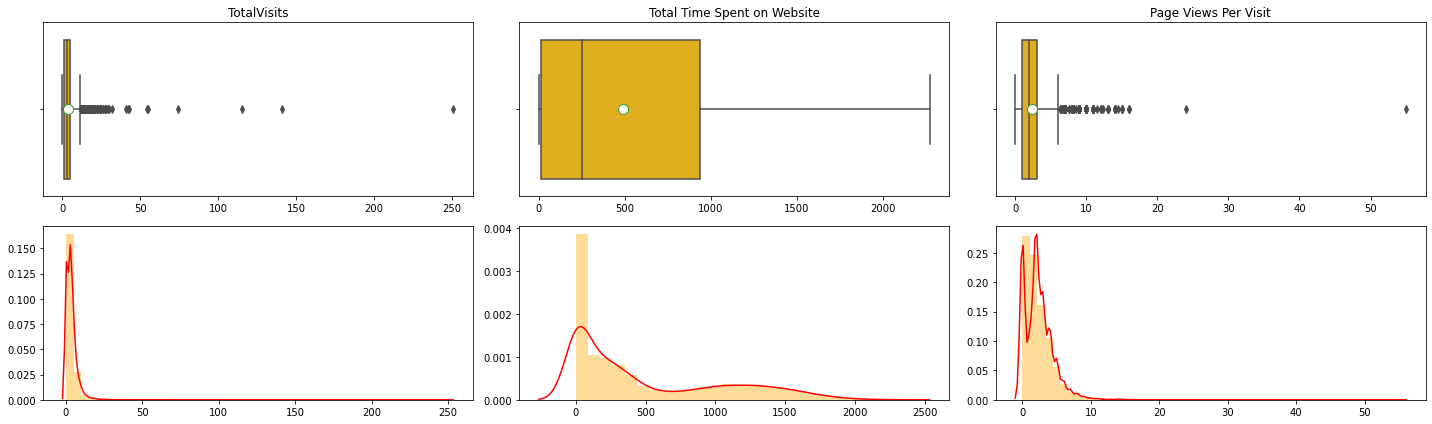

In [64]:
# Defining plot grid
fig, ax= plt.subplots(nrows= 2, ncols= 3, figsize= (20, 6))

# Iteration of loop
for i in range(len(cont_var)):
    
    # Plotting boxplot 1
    sns.boxplot(leads[cont_var[i]], ax= ax[0,i], showmeans= True, 
                meanprops= {'marker': 'o', 'markerfacecolor': 'white', 'markersize': '10'}, palette= 'Wistia')
    
    # Plotting distplot 2
    sns.distplot(leads[cont_var[i]], ax= ax[1,i], color= 'orange', kde_kws= {'color': 'red'})
    
    # Setting aesthetics for boxplot 1
    ax[0,i].set_title(cont_var[i])
    ax[0,i].set_xlabel('')
    
    # Setting aesthetics for distplot 2
    ax[1,i].set_ylabel('')
    ax[1,i].set_xlabel('')

plt.tight_layout()
plt.show()


<b>Observations:</b>
- Outliers found in TotalVisits and Page Views Per Visit
- Distribution of all continuous variables found to be right skewed. The right skew shows that: Mode < Median < Mean. This is also evident in our boxplots that feature mean value as a white round dot on each of the plots.

### Categorical Variables

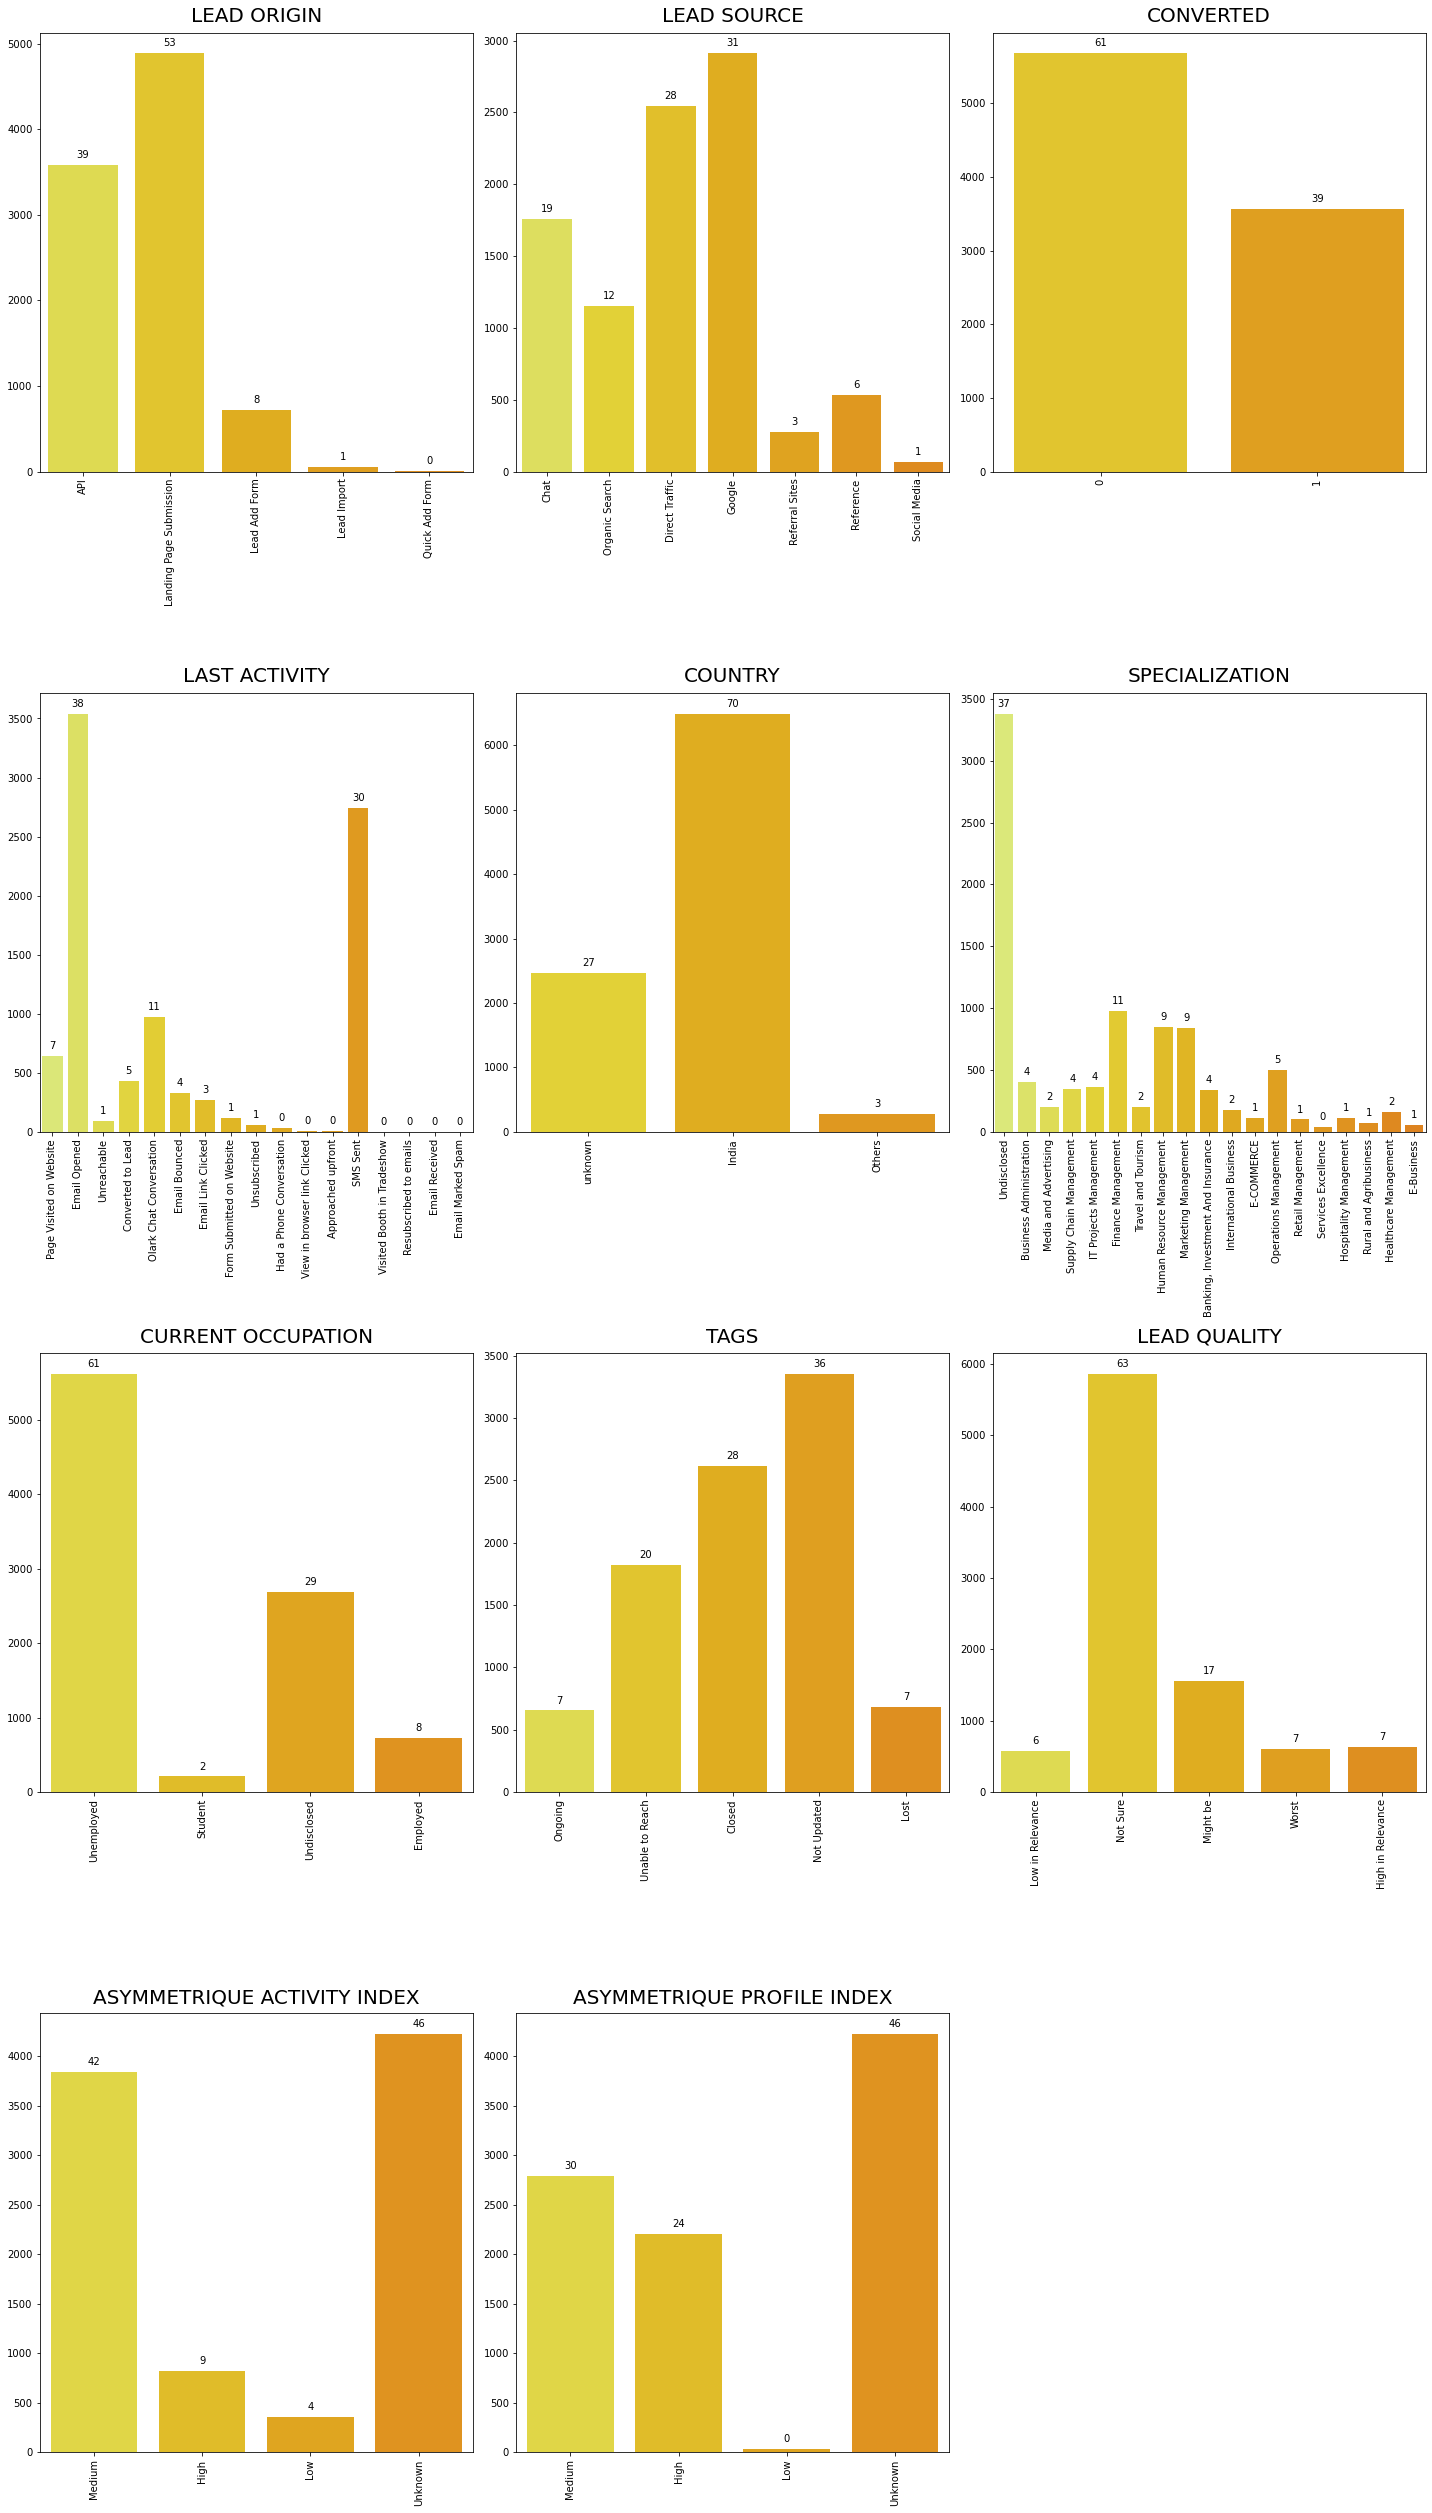

In [65]:

# Defining plot grid
fig, ax= plt.subplots(nrows= 4, ncols= 3, figsize= (20, 35))
fig.delaxes(ax[3,2])

# Initiating variable for iteration
h= 0

# Iterative loop
for i in range(4):
    for j in range(3):
        if h < len(cat_var):
            
            # Plotting he countplot
            sns.countplot(leads[cat_var[h]], ax= ax[i, j], palette= 'Wistia')
            
            # Setting aesthetics
            ax[i,j].set_xlabel('')
            ax[i,j].set_ylabel('')
            ax[i,j].set_title(cat_var[h].upper(), fontsize= 20, y= 1.01)
            ax[i,j].tick_params(axis='x', rotation=90)
            
            # Iteration for annotation
            for p in ax[i, j].patches:
                ax[i, j].annotate(format((p.get_height()/len(leads))*100, '.0f'), (p.get_x() + p.get_width() / 2., 
                                p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            h+=1
            
plt.tight_layout()
plt.show()


<b>Observations:</b>
- `Lead Origin`: Maximum number of leads have been recieved through the landing page (53%) followed by API (39%)
- `Lead Source`: 'Google' has been biggest lead source at 31% followed by 'Direct Traffic' at 28%, followed by 'Chat' at 19%
- `Converted`: Sales team is able to convert 39% of the leads whereas 61% are not converted.
- `Last Activity`: E Mail opened has been updated in 38% of cases and 30% as SMS sent. Rest are minor values.
- `Country`: 70% of the leads are from 'India' followed by 27% as 'Unknown'. Just 3% are from overseas markets.
- `Current Occupation`: 61% of the customers are unemployed, 29% of the customers have not disclosed their occupation. 8% are employed and just 2% are students.
- `Tags`: 36% of the status have not yet been updated by the team. 35% of the leads are 'Ongoing' and 8% are lost. A large chunk of elds are unreachable (20%).
- `Lead Quality`: Maximum occurance is for 'Not Sure' value (63%) and rest are much smaller in percentage.
- `Asymmetrique Activity Index & Asymmetrique Profile Index`: 46% of the entries are Unknown followed by 42% as Medium in Asymmetrique Activity Index and 30% as Medium in Asymmetrique Profile Index.

## Bivariate Analysis
<b>Pairwise Analysis of each of variables</b>

### Continuous Variables

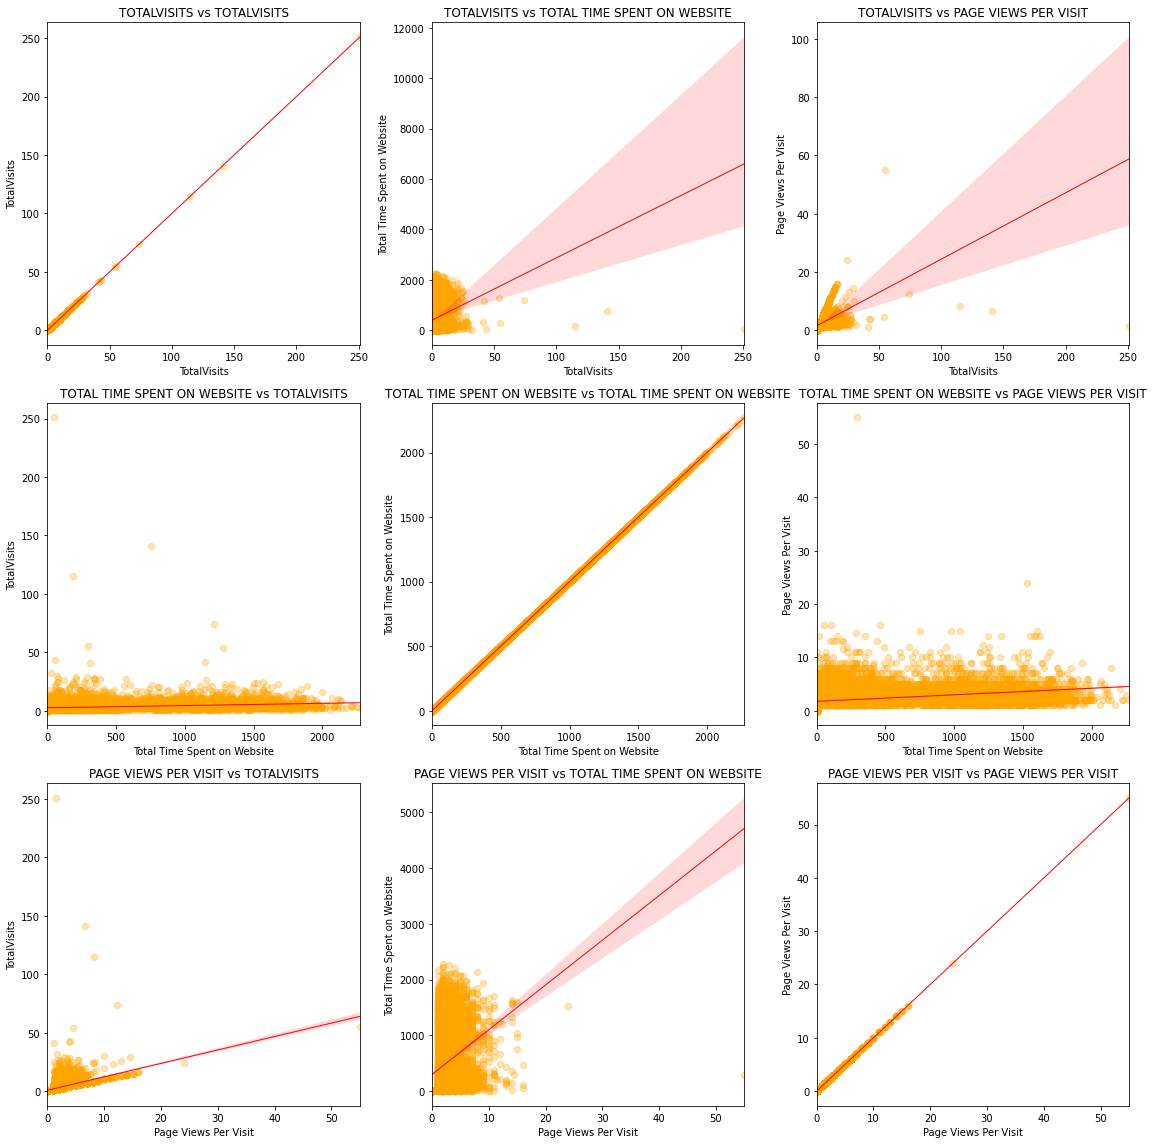

In [66]:
# Defining plot grid
fig, ax= plt.subplots(nrows= 3, ncols= 3, figsize= (16,16))

# Initiating variable for iteration
i= 0

# Iterative loop
for j in range(len(cont_var)):
    for k in range(len(cont_var)):
        
        # Plotting the regplot
        sns.regplot(x= leads[cont_var[j]], y= leads[cont_var[k]], ax= ax[j, k], 
                    scatter_kws= {'s': 40, 'alpha': 0.3, 'color': 'orange'}, line_kws= {'lw': 1, 'color': 'red'})
        
        # Setting aesthetics
        ax[j, k].set_title(f'{cont_var[j].upper()} vs {cont_var[k].upper()}')

plt.tight_layout()        
plt.show()

<b>Observations:</b>
- `Total Visits vs Page Views Per Visit:` The more is the number of times a student visits website, the more is the number of pages that he browses.

<b>Note:</b>
- We have preferred to use a regplot instead of a pairplot since we wanted to highlight the regression line that also visually shows the strength of relationship between 2 variables.

### Categorical VS Continuous Variables

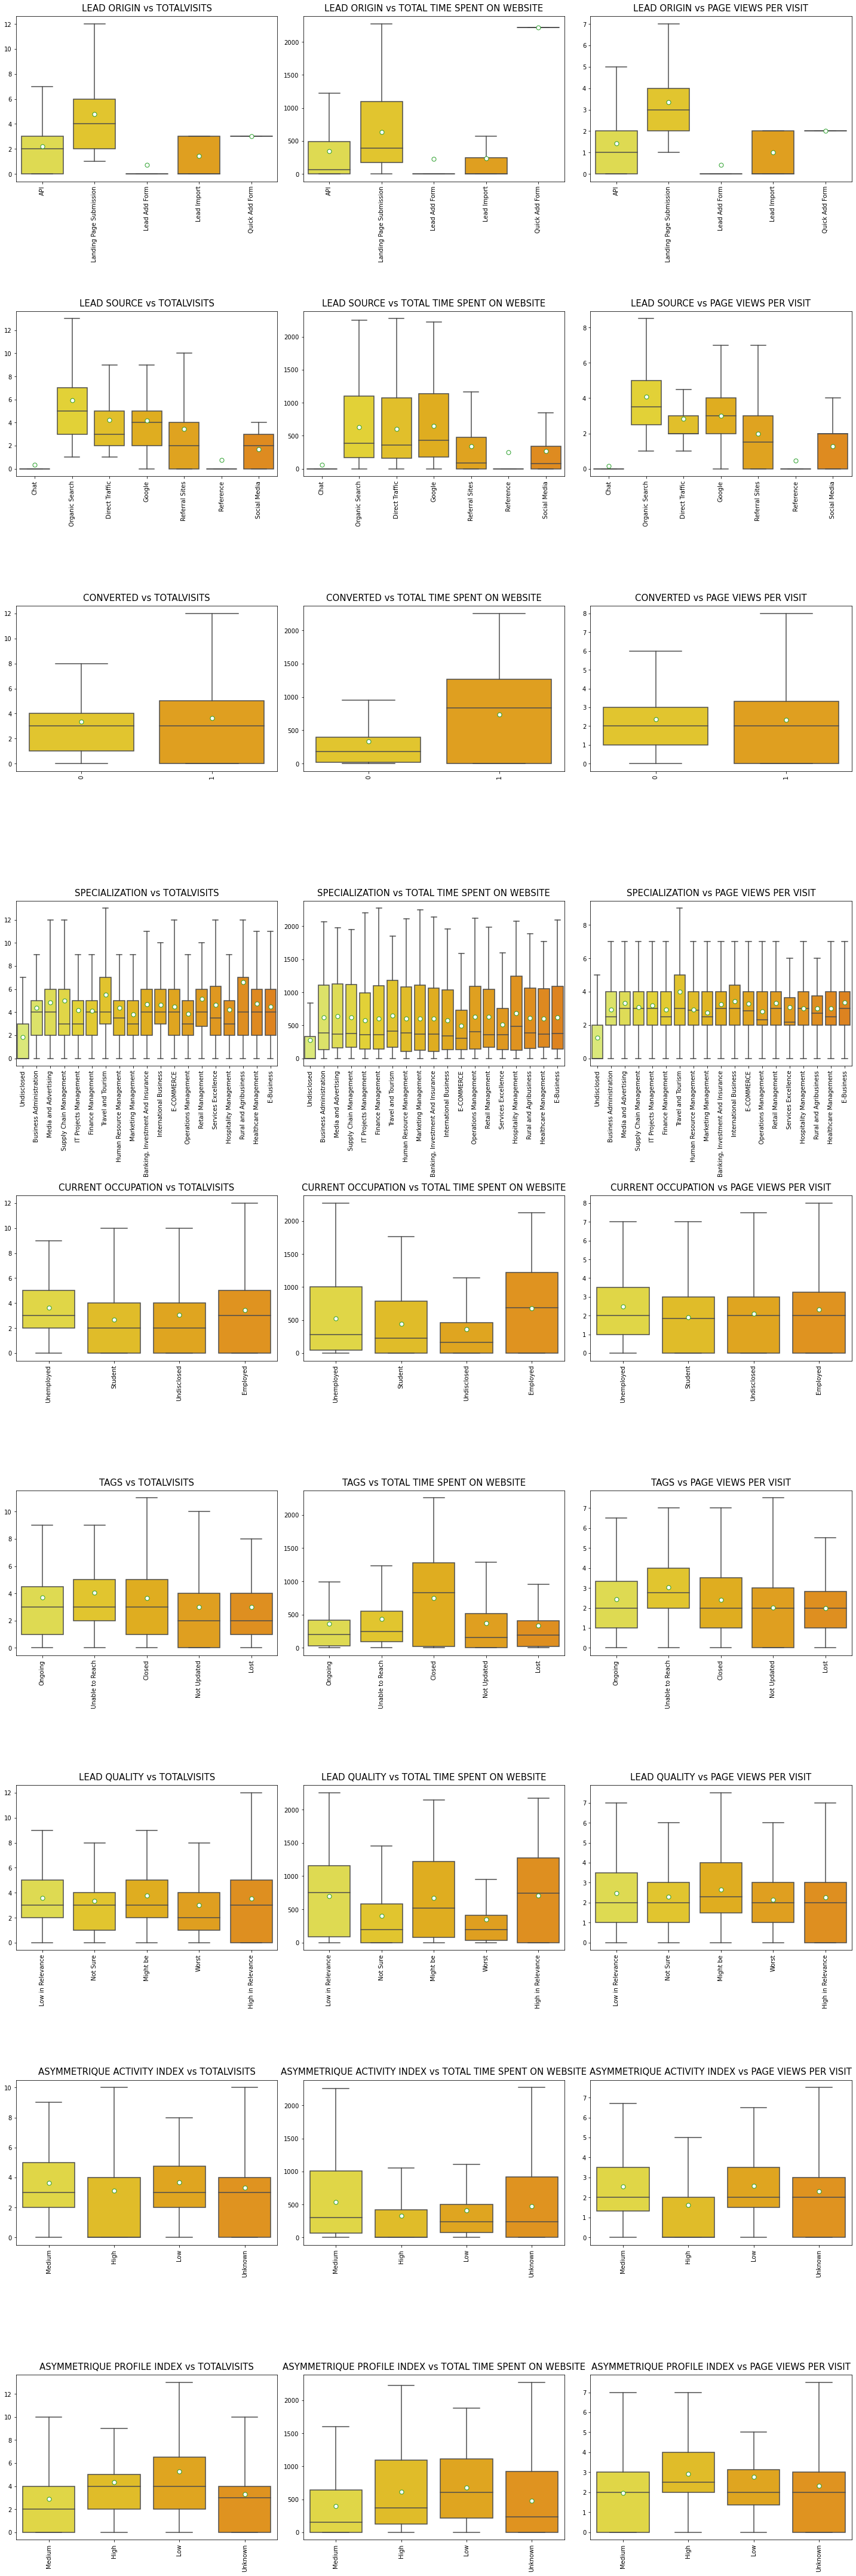

In [67]:

# Extracting seperate list of features from cat_var
myl= [i for i in cat_var if i not in ['Last Activity', 'Country']]

# Defining plot grid
fig, ax= plt.subplots(nrows= 9, ncols= 3, figsize= (20, 60))

# Iterative loop
for i in range(len(cont_var)):
    for j in range(len(myl)):
        
        # Plotting boxplot
        sns.boxplot(x= leads[myl[j]], y= leads[cont_var[i]], ax= ax[j, i], showmeans= True, showfliers= False,
                    meanprops= {'marker': 'o', 'markerfacecolor': 'white', 'markersize': '7'}, palette= 'Wistia')
        
        # Setting aesthetics
        ax[j,i].set_title(f'{myl[j].upper()} vs {cont_var[i].upper()}', fontsize= 15, y= 1.01)
        ax[j,i].set_xlabel('')
        ax[j,i].set_ylabel('')
        ax[j,i].tick_params(axis= 'x', rotation= 90)
    
plt.tight_layout()
plt.show()


<b>Observations:</b>
- Leads recieved from Landing Page Submission have pople spending highest amount of time on website, highet number of visits and page views per visit.
- Leads coming from Organic search show highest number of visits to website and number of page views per visit. Leads coming in from Organic Search, Direct Source and Google tend to spend highest total time on website.
- Converted leads typically tend to spend more time of website, more number of visits on visits and page views per visit.
- Employed people tend to spend relatively more time on the website and tend to visit the website relatively more numbber of times.

### Continuous Variables vs Target Variable

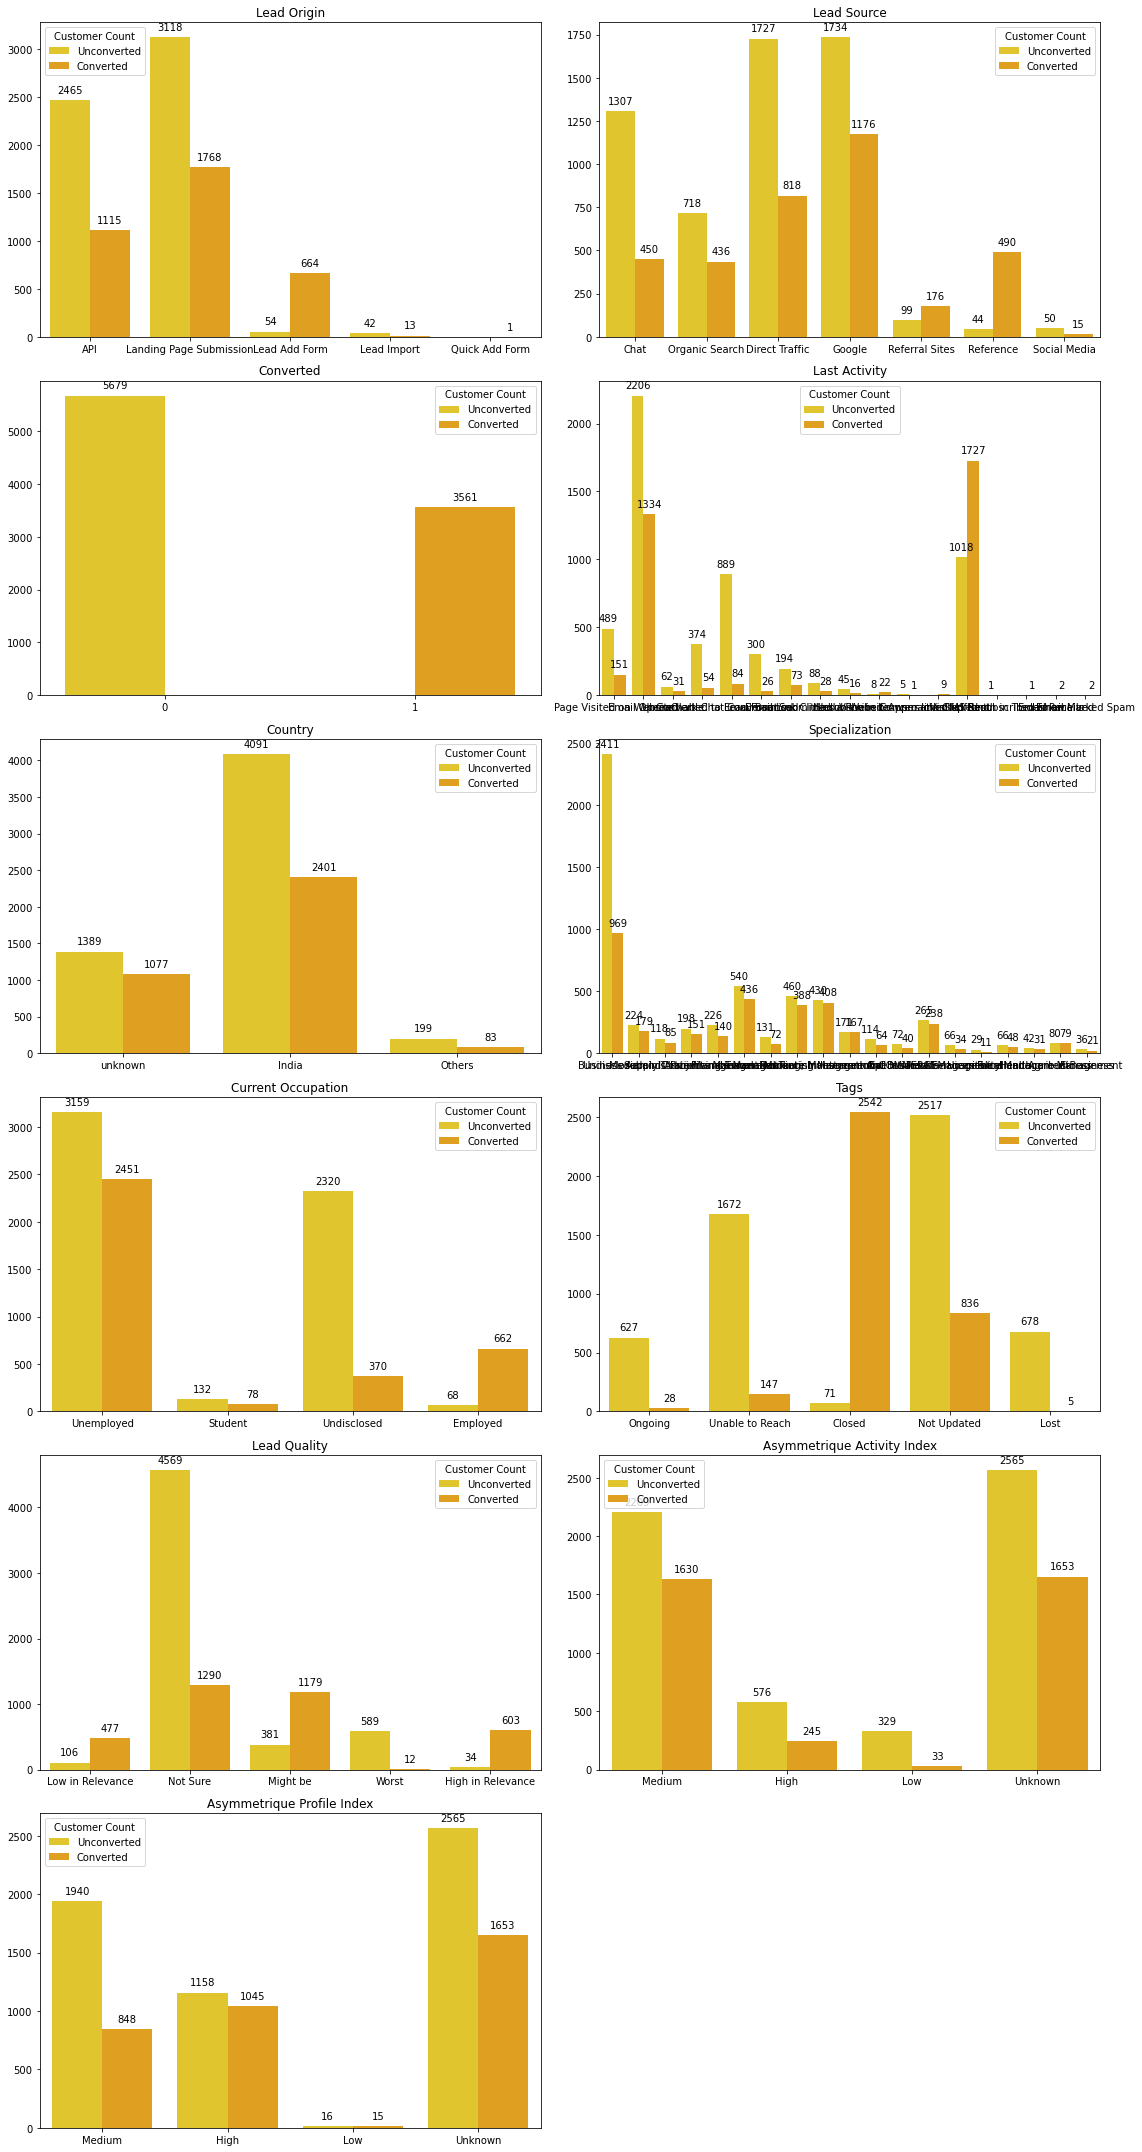

In [68]:
# Defining plot grid
fig, ax= plt.subplots(nrows= 6, ncols= 2, figsize= (16, 30))
fig.delaxes(ax[-1,-1])

# Initializing variable for iteration
k = 0
for i in range(6):
    for j in range(2):
        
        # Plotting the countplot
        sns.countplot(x= cat_var[k], data= leads, hue= 'Converted', ax= ax[i,j], palette= 'Wistia')
        
        # Setting aesthetics
        ax[i,j].set_ylabel('')
        ax[i,j].legend(['Unconverted', 'Converted'], title= 'Customer Count')
        ax[i,j].set_title(cat_var[k])
        ax[i,j].set_xlabel('')
        
        # Iterating for annotations
        for p in ax[i, j].patches:
                ax[i, j].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        if k < 10:
            k+=1

plt.tight_layout()
plt.show()


<b>Observations:</b>
- Leads coming in from Lead Add Form have more likelihood of converting.
- Leads with source as referral sites and reference have more likelihood of converting then not converting.
- Count of converted leads is much lower then unconverted leads.
- Leads coming in from employed customers have more likeihood of being confirmed then being lost. Least likelihood of a lead becoming not confirmed is when the lead diesnt reveal its current occupation.

## Multivariate Analysis
<b>Combined Analysis of 3 or more variables</b>

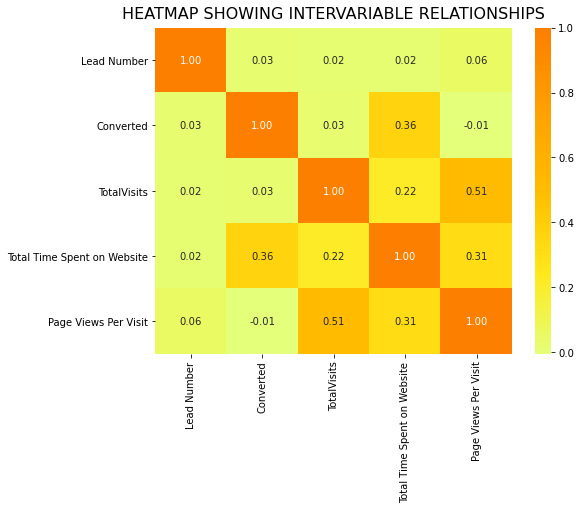

In [69]:

# Defining figure
plt.figure(figsize= (8,6))

# Plotting heatmap
sns.heatmap(leads.corr(), annot= True, cmap= 'Wistia', fmt= '.2f')

# Setting aesthetics
plt.title('heatmap showing intervariable relationships'.upper(), y= 1.01, fontsize= 16)

plt.show()


<b>Observations:</b>
- Target Variable has shown weak direct proportionality with time spent on website
- TotalVisits has shown medium direct proportionality with page views per visit

__However, instead of trying to asses which column shall be more appropriate to drop in order to avoid multicollinearity, we will take assistance from VIF in later stages.__

# Model Building

<b>`Given business problem qualifies to be a Binary Logistic Regression Problem because:`</b>
- It is supervised machine learning problem since target variable is given. 
- Based on Target variable, which is binary, based on which prediction is to be made, it qualfies to be a Logistic Regression Problem.
- The dependent variable 'Converted' is based upon multiple independent variables.

__Dropping lead number since that will be redundant feature during model building process.__

In [70]:
# Creating a deep copy to build model:

leads_ml= leads.drop(columns= 'Lead Number', axis= 1).copy(deep= True)


In [71]:
# A Quick glance at the dataset:

leads_ml.head(2)


,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current Occupation,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index
0,API,Chat,0,0.0,0,0.0,Page Visited on Website,unknown,Undisclosed,Unemployed,Ongoing,Low in Relevance,Medium,Medium
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Undisclosed,Unemployed,Unable to Reach,Not Sure,Medium,Medium


In [72]:
# Shape of dataframe

print(f'Prepared dataset has {leads_ml.shape[0]} rows and {leads_ml.shape[1]} columns.')


Prepared dataset has 9240 rows and 14 columns.


## Dummy Variable Creation

In [73]:
# Creating a list of features to be converted to dummy variable:
dummy_list= list(leads_ml.select_dtypes(include= 'object').columns)

# Creating Dummies:

for i in dummy_list:
    
    # Creating dummies and storing in my_d
    my_d= pd.get_dummies(data= leads_ml[i], drop_first= True, prefix_sep= '_', prefix= i)
    
    # Concatanating with leads_ml
    leads_ml= pd.concat([leads_ml, my_d], axis= 1).drop(labels= i, axis= 1)
    

In [74]:
# Re - inspecting the dataframe:
leads_ml.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Activity Index_Unknown,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium,Asymmetrique Profile Index_Unknown
0,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [75]:
# Shape of dataframe

print(f'Prepared dataset has {leads_ml.shape[0]} rows and {leads_ml.shape[1]} columns.')


Prepared dataset has 9240 rows and 67 columns.


## Train Test Split

Splitting the leads_ml dataframe in 2 parts:
- Train dataset: This constitutes 70% of the data and will be used in training the model.
- Test dataset: This constitutes 30% of the data and will be used in testing the model on various parameters such as:
    - If the model can be generalized.
    - Evaluating model on various parameters

In [76]:

# Splitting the dataset in test and train
leads_train, leads_test= train_test_split(leads_ml, test_size= 0.3, random_state= 100)

# Checking the shape of new dataframes:
print('leads_train shape:', leads_train.shape)
print('leads_test shape:', leads_test.shape)


leads_train shape: (6468, 67)
leads_test shape: (2772, 67)


## Rescaling of data

<b>We need to chose from 2 of rescaling techniques:</b>
- Normalization: Also, called Min Max Scaling, it compresses the features in the range between 0 and 1.
- Standardization: It moves data on plot in such a way that mean becomes 0 and standard deviation becomes 1.

<b>In this case, researcher we decide to use MinMaxScaler because:</b>
- As shown in previous secion of EDA, some of the features contained outliers. We have not handled those outliers till now and MinMaxScaler will automatically handle them.
- Distribution does not matter in our dataset.
- Presence of binary variables which are already in 0 and 1 form. So rest of the data can be scaled accordingly.

MinMaxScaler uses Normalization formula of (X-Xmin)/(Xmax-Xmin) which basically translates the maximum data value as 1 and minimum data value as 0. Rest of the datapoints will remain between 1 and 0 based on relative context.

<b>Rescaling of data is done post the train_test_split because we don't want the scaler &/ or final model to know the test dataset.</b>

In [77]:
# Creating an instance of scaler:
scaler= MinMaxScaler()


In [78]:

# Initializing a list of feature names for scaling
scaler_list= [i for i in leads_train.columns if leads_train[i].nunique() > 2]

# Scaling the variables and saving in our dataframe:
leads_train[scaler_list]= scaler.fit_transform(leads_train[scaler_list])


In [79]:
# Inspecting our dataframe:

leads_train.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Activity Index_Unknown,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium,Asymmetrique Profile Index_Unknown
1871,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6795,0,0.015936,0.214349,0.024182,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3516,0,0.019920,0.046655,0.045455,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
8105,0,0.019920,0.541373,0.090909,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3934,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


## Splitting training dataset in X & y

y: Target Variable ('Converted')

X: Dependent Variable Dataframe

In [80]:

# Splitting the train data in X & y:
y_train= leads_train.pop('Converted')
X_train= leads_train

# Inspecting the shape of X & y:
print('y train Shape:', y_train.shape)
print('X train Shape:', X_train.shape)


y train Shape: (6468,)
X train Shape: (6468, 66)


## Model Development

We will use dual approach in Feature Selection:
- Automated: RFE shall be used in initial feature selection which will substantially reduce the unnecessary features
- Manual: Manual fine tuning of features shall be done based on p value and VIF values.

### RFE
__(Recursive Feature Elimination)__

In [81]:

# Creating a LogisticRegression instance:
logreg= LogisticRegression()

rfe= RFE(logreg, 20)       # Selecting 15 variables as output using RFE
rfe.fit(X_train, y_train)  # Fitting the data with training dataset (X & y)


RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [82]:

# Checking recommendations given by RFE in a dataframe:

# Initializing a blank dataframe:
rfe_df= pd.DataFrame()

# Updating data:
rfe_df['Column Name']= X_train.columns
rfe_df['Recommendation']= rfe.support_
rfe_df['Rank']= rfe.ranking_

# Sorting dataframe
rfe_df= rfe_df.sort_values(by= 'Rank')

rfe_df


,Column Name,Recommendation,Rank
11,Lead Source_Referral Sites,True,1
54,Tags_Ongoing,True,1
58,Lead Quality_Not Sure,True,1
59,Lead Quality_Worst,True,1
14,Last Activity_Email Bounced,True,1
...,...,...,...
29,Country_Others,False,43
41,Specialization_Media and Advertising,False,44
28,Last Activity_Visited Booth in Tradeshow,False,45
16,Last Activity_Email Marked Spam,False,46


In [83]:

# Features recommended by RFE to be included in our model:
rfe_df[rfe_df['Recommendation']== True]


,Column Name,Recommendation,Rank
11,Lead Source_Referral Sites,True,1
54,Tags_Ongoing,True,1
58,Lead Quality_Not Sure,True,1
59,Lead Quality_Worst,True,1
14,Last Activity_Email Bounced,True,1
13,Last Activity_Converted to Lead,True,1
30,Country_unknown,True,1
24,Last Activity_SMS Sent,True,1
53,Tags_Not Updated,True,1
60,Asymmetrique Activity Index_Low,True,1


In [84]:
# Columns to be included
col= X_train.columns[rfe.support_]
col


Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_unknown', 'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism', 'Current Occupation_Undisclosed',
       'Tags_Lost', 'Tags_Not Updated', 'Tags_Ongoing', 'Tags_Unable to Reach',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_Low'],
      dtype='object')

In [85]:
# Columns not to be included
X_train.columns[~rfe.support_]


Index(['TotalVisits', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Country_Others',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Man

<b>Based on recommendations from RFE, we re-initialize our X_train with recommended columns included in it.</b>

In [86]:
X_train= X_train[col]
X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Import,Lead Source_Referral Sites,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_unknown,Specialization_Hospitality Management,Specialization_Travel and Tourism,Current Occupation_Undisclosed,Tags_Lost,Tags_Not Updated,Tags_Ongoing,Tags_Unable to Reach,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Asymmetrique Activity Index_Low
1871,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
6795,0.214349,0.024182,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3516,0.046655,0.045455,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
8105,0.541373,0.090909,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3934,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


### Modelling using GLM

<b>We will use Generalized Linear Model Regression (GLM) from statsmodels library to create our Model</b>

While building an appropriate model we will use p-value and VIF value to determine which of the features are to be retained and which ones need to be dropped.
- Features with a p-value of higher then 0.05 shall be dropped since they are insignificant in model
- Features with VIF value higher then 5 will be dropped since they show high multi collinearity

We will have to re-develop the model post every drop of feature to ascertain levels of p-value and VIF value making it iterative process. Thus, to avoid re-writing the same code multiple times we will define functions to:
- Create a dataframe that shows features with high VIF values
- Creating GLM table showing statistical values of each of the model features


In [87]:
# Defining a function to create model

def model_build(train_x, train_y):
    X_train_sm= sm.add_constant(train_x)
    logmodel= sm.GLM(train_y, X_train_sm, family= sm.families.Binomial())
    res= logmodel.fit()
    return res.summary()
    

In [88]:
# Defining a function to create VIF Table

def vif_table(dataframe):
    vif= pd.DataFrame()
    vif['Feature']= dataframe.columns
    vif['VIF Value']= [round(variance_inflation_factor(dataframe.values, i), 2) for i in range(len(dataframe.columns))]
    vif= vif.sort_values(by= 'VIF Value', ascending= False)
    return vif


#### Building GLM Regression Model

In [89]:
model_build(X_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1382.9
Date:                Wed, 08 Dec 2021   Deviance:                       2765.8
Time:                        22:23:45   Pearson chi2:                 7.02e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.3714      0.244      9.732      0.000       1.894       2.849
Total Time Spent on Website               4.3074      0.241     17.857      0.000       3.835       4.780
Page Views Per Visit                     -2.3411      1.521     -1.539      0.124      -5.322       0.640
Lead Origin_Lead Import                  -1.7535      0.674     -2.600      0.009      -3.075      -0.432
Lead Source_Referral Sites                1.0565      0.281      3.764      0.000       0.506       1.607
Last Activity_Converted to Lead          -1.3051      0.320     -4.082      0.000      -1.932      -0.678
Last Activity_Email Bounced              -1.6769      0.387     -4.337      0.000      -2.435      -0.919
Last Activity_Olark Chat Conversation    -1.3815      0.216     -6.383      0.000      -1.806      -0.957
Last Activity_SMS Sent                    1.8371      0.117     15.707      0.000       1.608       2.066
Country_unknown                           1.0056      0.158      6.382      0.000       0.697       1.314
Specialization_Hospitality Management    -1.1200      0.443     -2.529      0.011      -1.988      -0.252
Specialization_Travel and Tourism        -1.3503      0.372     -3.632      0.000      -2.079      -0.622
Current Occupation_Undisclosed           -2.4649      0.141    -17.454      0.000      -2.742      -2.188
Tags_Lost                                -6.5456      0.609    -10.755      0.000      -7.738      -5.353
Tags_Not Updated                         -1.9244      0.193     -9.975      0.000      -2.303      -1.546
Tags_Ongoing                             -5.2148      0.282    -18.486      0.000      -5.768      -4.662
Tags_Unable to Reach                     -5.7553      0.205    -28.138      0.000      -6.156      -5.354
Lead Quality_Might be                    -1.2182      0.253     -4.818      0.000      -1.714      -0.723
Lead Quality_Not Sure                    -1.2982      0.248     -5.240      0.000      -1.784      -0.813
Lead Quality_Worst                       -4.0855      0.479     -8.533      0.000      -5.024      -3.147
Asymmetrique Activity Index_Low          -1.6804      0.345     -4.877      0.000      -2.356      -1.005
=========================================================================================================
"""

<b>Observations:</b>
- pvalues of Page Views Per Visit and Specialization_Hospitality Management are higher then the threshold value of 0.05.
- However, since Page Views Per Visit seems to be more relevant to the problem, we will drop Specialization_Hospitality Management from dataframe for further evalution.

<b>Dropping Specialization_Hospitality Management from X_train

In [90]:
X_train.drop(labels= 'Specialization_Hospitality Management', axis= 1, inplace= True)

#### Rebuilding GLM Regression Model

In [91]:
model_build(X_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1386.1
Date:                Wed, 08 Dec 2021   Deviance:                       2772.2
Time:                        22:23:45   Pearson chi2:                 6.94e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.3465      0.243      9.648      0.000       1.870       2.823
Total Time Spent on Website               4.2688      0.240     17.770      0.000       3.798       4.740
Page Views Per Visit                     -2.3872      1.525     -1.565      0.118      -5.377       0.603
Lead Origin_Lead Import                  -1.7485      0.671     -2.604      0.009      -3.065      -0.432
Lead Source_Referral Sites                1.0643      0.280      3.801      0.000       0.516       1.613
Last Activity_Converted to Lead          -1.3254      0.319     -4.157      0.000      -1.950      -0.700
Last Activity_Email Bounced              -1.6858      0.390     -4.322      0.000      -2.450      -0.921
Last Activity_Olark Chat Conversation    -1.3740      0.216     -6.368      0.000      -1.797      -0.951
Last Activity_SMS Sent                    1.8302      0.117     15.673      0.000       1.601       2.059
Country_unknown                           1.0031      0.158      6.365      0.000       0.694       1.312
Specialization_Travel and Tourism        -1.3261      0.371     -3.575      0.000      -2.053      -0.599
Current Occupation_Undisclosed           -2.4622      0.141    -17.452      0.000      -2.739      -2.186
Tags_Lost                                -6.5223      0.608    -10.726      0.000      -7.714      -5.331
Tags_Not Updated                         -1.9151      0.193     -9.944      0.000      -2.293      -1.538
Tags_Ongoing                             -5.2205      0.282    -18.496      0.000      -5.774      -4.667
Tags_Unable to Reach                     -5.7380      0.204    -28.175      0.000      -6.137      -5.339
Lead Quality_Might be                    -1.2031      0.253     -4.764      0.000      -1.698      -0.708
Lead Quality_Not Sure                    -1.2825      0.248     -5.177      0.000      -1.768      -0.797
Lead Quality_Worst                       -4.0504      0.478     -8.472      0.000      -4.987      -3.113
Asymmetrique Activity Index_Low          -1.6691      0.343     -4.860      0.000      -2.342      -0.996
=========================================================================================================
"""

<b>Observations:</b>
- All pvalues are within threshold signifying that features are relevant to our model except Page Views Per Visit
- However, we will still not drop the feature Page Views Per Visit since it seems relevant.
- We will now refer to VIF table to remove multicollinearity. In case the same feature appears to be highly explained by other feartures, we will drop it, otherwise there is a high possibility that it may reduce its p-value when we drop other highly multicollinear features.

#### VIF Table

In [92]:
vif_table(X_train)

,Feature,VIF Value
16,Lead Quality_Not Sure,9.97
12,Tags_Not Updated,8.19
10,Current Occupation_Undisclosed,4.39
14,Tags_Unable to Reach,3.03
1,Page Views Per Visit,2.80
11,Tags_Lost,2.33
17,Lead Quality_Worst,2.32
0,Total Time Spent on Website,1.97
15,Lead Quality_Might be,1.97
8,Country_unknown,1.86


<b>Observations:</b>
- Lead Quality_Not Sure has highest VIF value. Hence, we will first drop it and then re-evaluate VIF table.

In [93]:
#Dropping Lead Quality_Not Sure from Dataframe

X_train= X_train.drop(labels= 'Lead Quality_Not Sure', axis= 1)


#### Re- examining VIF Table

In [94]:
vif_table(X_train)

,Feature,VIF Value
12,Tags_Not Updated,5.31
10,Current Occupation_Undisclosed,4.33
1,Page Views Per Visit,2.68
0,Total Time Spent on Website,1.90
11,Tags_Lost,1.86
16,Lead Quality_Worst,1.77
7,Last Activity_SMS Sent,1.76
8,Country_unknown,1.75
15,Lead Quality_Might be,1.55
14,Tags_Unable to Reach,1.47


<b>Observations:</b>
- Tags_Not Updated has highest VIF value. Hence, we will first drop it and then re-evaluate VIF table.

In [95]:
# Dropping Tags_Not Updated from Dataframe

X_train= X_train.drop(labels= 'Tags_Not Updated', axis= 1)


#### Re- examining VIF Table

In [96]:
vif_table(X_train)

,Feature,VIF Value
1,Page Views Per Visit,2.59
0,Total Time Spent on Website,1.88
11,Tags_Lost,1.84
15,Lead Quality_Worst,1.77
7,Last Activity_SMS Sent,1.71
10,Current Occupation_Undisclosed,1.69
8,Country_unknown,1.62
14,Lead Quality_Might be,1.47
6,Last Activity_Olark Chat Conversation,1.41
13,Tags_Unable to Reach,1.41


<b>Observations:</b>
- All VIF values are within prescribed limit of 5

#### Rebuilding GLM Regression Model

In [97]:
model_build(X_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1512.2
Date:                Wed, 08 Dec 2021   Deviance:                       3024.4
Time:                        22:23:46   Pearson chi2:                 6.89e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6635      0.139      4.776      0.000       0.391       0.936
Total Time Spent on Website               4.3798      0.232     18.919      0.000       3.926       4.834
Page Views Per Visit                     -2.0348      1.289     -1.579      0.114      -4.561       0.491
Lead Origin_Lead Import                  -2.2148      0.652     -3.397      0.001      -3.493      -0.937
Lead Source_Referral Sites                0.5120      0.299      1.710      0.087      -0.075       1.099
Last Activity_Converted to Lead          -1.2734      0.288     -4.424      0.000      -1.838      -0.709
Last Activity_Email Bounced              -2.2957      0.341     -6.735      0.000      -2.964      -1.628
Last Activity_Olark Chat Conversation    -1.7175      0.206     -8.334      0.000      -2.121      -1.314
Last Activity_SMS Sent                    1.5982      0.114     13.994      0.000       1.374       1.822
Country_unknown                           0.9360      0.146      6.433      0.000       0.651       1.221
Specialization_Travel and Tourism        -1.0272      0.329     -3.122      0.002      -1.672      -0.382
Current Occupation_Undisclosed           -3.7961      0.122    -31.021      0.000      -4.036      -3.556
Tags_Lost                                -6.0529      0.599    -10.105      0.000      -7.227      -4.879
Tags_Ongoing                             -4.4436      0.260    -17.105      0.000      -4.953      -3.934
Tags_Unable to Reach                     -5.2738      0.161    -32.723      0.000      -5.590      -4.958
Lead Quality_Might be                     0.4059      0.151      2.695      0.007       0.111       0.701
Lead Quality_Worst                       -2.3979      0.432     -5.546      0.000      -3.245      -1.550
Asymmetrique Activity Index_Low          -1.9202      0.320     -5.997      0.000      -2.548      -1.293
=========================================================================================================
"""

<b>Observations:</b>
- This time we shall drop Page Views Per Visit

In [98]:
# Dropping Page Views Per Visit from dataframe
X_train.drop(labels= 'Page Views Per Visit', axis= 1, inplace= True)

#### Rebuilding GLM Regression Model

In [99]:
model_build(X_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1513.5
Date:                Wed, 08 Dec 2021   Deviance:                       3027.0
Time:                        22:23:47   Pearson chi2:                 6.93e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5494      0.119      4.628      0.000       0.317       0.782
Total Time Spent on Website               4.3662      0.231     18.873      0.000       3.913       4.820
Lead Origin_Lead Import                  -2.2244      0.651     -3.415      0.001      -3.501      -0.948
Lead Source_Referral Sites                0.5070      0.299      1.696      0.090      -0.079       1.093
Last Activity_Converted to Lead          -1.2284      0.287     -4.287      0.000      -1.790      -0.667
Last Activity_Email Bounced              -2.2748      0.342     -6.653      0.000      -2.945      -1.605
Last Activity_Olark Chat Conversation    -1.7072      0.206     -8.285      0.000      -2.111      -1.303
Last Activity_SMS Sent                    1.5998      0.114     14.017      0.000       1.376       1.824
Country_unknown                           1.0378      0.131      7.936      0.000       0.781       1.294
Specialization_Travel and Tourism        -1.0736      0.327     -3.285      0.001      -1.714      -0.433
Current Occupation_Undisclosed           -3.7962      0.122    -31.031      0.000      -4.036      -3.556
Tags_Lost                                -6.0435      0.599    -10.088      0.000      -7.218      -4.869
Tags_Ongoing                             -4.4460      0.259    -17.137      0.000      -4.955      -3.938
Tags_Unable to Reach                     -5.2789      0.161    -32.781      0.000      -5.595      -4.963
Lead Quality_Might be                     0.4035      0.151      2.680      0.007       0.108       0.699
Lead Quality_Worst                       -2.3930      0.432     -5.540      0.000      -3.240      -1.546
Asymmetrique Activity Index_Low          -1.9046      0.319     -5.964      0.000      -2.531      -1.279
=========================================================================================================
"""

<b>Observations:</b>
- We will now drop Lead Source_Referral Sites from dataframe

In [100]:
# Dropping Lead Source_Referral Sites:
X_train.drop(labels= 'Lead Source_Referral Sites', axis= 1, inplace= True)

#### Rebuilding GLM Regression Model

In [101]:
model_build(X_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1515.0
Date:                Wed, 08 Dec 2021   Deviance:                       3030.0
Time:                        22:23:47   Pearson chi2:                 6.96e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5715      0.118      4.834      0.000       0.340       0.803
Total Time Spent on Website               4.3699      0.232     18.875      0.000       3.916       4.824
Lead Origin_Lead Import                  -2.2514      0.652     -3.455      0.001      -3.529      -0.974
Last Activity_Converted to Lead          -1.2356      0.287     -4.308      0.000      -1.798      -0.673
Last Activity_Email Bounced              -2.2856      0.342     -6.678      0.000      -2.956      -1.615
Last Activity_Olark Chat Conversation    -1.7180      0.205     -8.374      0.000      -2.120      -1.316
Last Activity_SMS Sent                    1.5972      0.114     14.021      0.000       1.374       1.820
Country_unknown                           1.0485      0.130      8.043      0.000       0.793       1.304
Specialization_Travel and Tourism        -1.0779      0.327     -3.296      0.001      -1.719      -0.437
Current Occupation_Undisclosed           -3.8117      0.122    -31.217      0.000      -4.051      -3.572
Tags_Lost                                -6.0647      0.599    -10.124      0.000      -7.239      -4.891
Tags_Ongoing                             -4.4280      0.258    -17.177      0.000      -4.933      -3.923
Tags_Unable to Reach                     -5.2968      0.161    -32.922      0.000      -5.612      -4.981
Lead Quality_Might be                     0.3975      0.151      2.636      0.008       0.102       0.693
Lead Quality_Worst                       -2.4145      0.432     -5.589      0.000      -3.261      -1.568
Asymmetrique Activity Index_Low          -1.9016      0.319     -5.962      0.000      -2.527      -1.276
=========================================================================================================
"""

<b>Observations:</b>
- Feature Lead Quality_Might be still shows hogher pvalue

In [102]:
# Dropping Lead Quality_Might be:
X_train.drop(labels= 'Lead Quality_Might be', axis= 1, inplace= True)

#### Rebuilding GLM Regression Model

In [103]:
model_build(X_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1518.5
Date:                Wed, 08 Dec 2021   Deviance:                       3037.0
Time:                        22:23:47   Pearson chi2:                 7.04e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6658      0.113      5.878      0.000       0.444       0.888
Total Time Spent on Website               4.3664      0.231     18.886      0.000       3.913       4.820
Lead Origin_Lead Import                  -2.2233      0.654     -3.400      0.001      -3.505      -0.942
Last Activity_Converted to Lead          -1.2231      0.286     -4.282      0.000      -1.783      -0.663
Last Activity_Email Bounced              -2.3307      0.342     -6.809      0.000      -3.002      -1.660
Last Activity_Olark Chat Conversation    -1.6962      0.205     -8.292      0.000      -2.097      -1.295
Last Activity_SMS Sent                    1.6454      0.112     14.688      0.000       1.426       1.865
Country_unknown                           1.0247      0.130      7.886      0.000       0.770       1.279
Specialization_Travel and Tourism        -1.0883      0.327     -3.327      0.001      -1.729      -0.447
Current Occupation_Undisclosed           -3.9206      0.116    -33.757      0.000      -4.148      -3.693
Tags_Lost                                -6.1058      0.600    -10.184      0.000      -7.281      -4.931
Tags_Ongoing                             -4.4633      0.257    -17.336      0.000      -4.968      -3.959
Tags_Unable to Reach                     -5.3330      0.160    -33.354      0.000      -5.646      -5.020
Lead Quality_Worst                       -2.5062      0.432     -5.805      0.000      -3.352      -1.660
Asymmetrique Activity Index_Low          -1.9522      0.320     -6.099      0.000      -2.580      -1.325
=========================================================================================================
"""

<b>Observations:</b>
- All features seem to show pvalues in acceptable limits

#### Re- examining VIF Table

In [104]:
vif_table(X_train)

,Feature,VIF Value
9,Tags_Lost,1.79
12,Lead Quality_Worst,1.76
5,Last Activity_SMS Sent,1.48
6,Country_unknown,1.46
0,Total Time Spent on Website,1.43
4,Last Activity_Olark Chat Conversation,1.40
8,Current Occupation_Undisclosed,1.38
10,Tags_Ongoing,1.19
11,Tags_Unable to Reach,1.19
2,Last Activity_Converted to Lead,1.10


<b>Observations:</b>
- All VIF values are within acceptable limits.

## y_train Predictions

The above iterative process was done with the help of customize function that saves all required values in local variables and hence the same variable is not available to be used outside of variable. Thus, we will refit the model and save the results seperately.

In [105]:

# Adding constant
X_train_sm= sm.add_constant(X_train)

# Logmodel containing GLM model
logmodel= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

# res containing the fitted model
res= logmodel.fit()


In [106]:

# Predicting the probability of of being 1:
y_train_pred= res.predict(X_train_sm).values


In [107]:
# Saving results in a dataframe

# Initializing the dataframe
y_train_pred_final= pd.DataFrame()

# Adding data in our dataframe
y_train_pred_final['Converted']= y_train
y_train_pred_final['Y Train Pred']= y_train_pred

y_train_pred_final.head()


,Converted,Y Train Pred
1871,0,0.025520
6795,0,0.832266
3516,0,0.031106
8105,0,0.341221
3934,0,0.844297


<b>Note:</b>
- In above dataframe, we have updated actuals of target variable and probability of target variable being 1 as predicted by our model side by side.
- We will now 'assume' the threshold to be 0.5 beyond which our prediction will be signified as 1 and below otherwise.

In [108]:
# Assuming 0.5 to be the threshold value and making predictions:

y_train_pred_final['Derived Prediction']= y_train_pred_final['Y Train Pred'].map(lambda x: 0 if x <= 0.5 else 1)


In [109]:
y_train_pred_final.head()

,Converted,Y Train Pred,Derived Prediction
1871,0,0.025520,0
6795,0,0.832266,1
3516,0,0.031106,0
8105,0,0.341221,0
3934,0,0.844297,1


<b>Note:</b>
- Based on our earlier assumption, we have updated the values of prediction. Wherever the Y Train Pred is > 0.5, we have derived a prediction of 1 else 0.

## Model Accuracy Measurement

Since we based our prediction on arbitrary assumed cutoff of 0.5 as threshold value, we are bound to have errors in our derived prediction. Following are 2 types of errors:
- False Positive (Type 1): Converted customers classified as Non Converted
- False Negative (Type 2): Non Converted customers classified as Converted

<b> To capture these erros and evaluate our model, we will use confusion matrix</b>

### Confusion Matrix

In [110]:
confusion= metrics.confusion_matrix(y_true= y_train_pred_final['Converted'], y_pred= y_train_pred_final['Derived Prediction'])
confusion

array([[3758,  244],
       [ 343, 2123]], dtype=int64)

In [111]:
# Predicted          not converted    converted
# Actual
# not converted            3748      244
# converted                343       2123 

In [112]:
# Initializing variables for all 4 parameters:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


Above variables will be used for further accuracy calculations.

#### Overall Model Accuracy

In [113]:
accuracy_score(y_true= y_train_pred_final['Converted'], y_pred= y_train_pred_final['Derived Prediction'])

0.9092455163883735

<b>Observations:</b>
- Model accuracy score is 91%

<b>Note:</b>
- Overall accuracy score is a measure of actual 'Converted' status with that of derived 'Converted' status.
- Our focus is to get a better accuracy for True Positives which accuracy score doesnt allow to measure.

<b>Hence, we will use `True Positive Rate and False Positive Rate` as matrices to asses our model accuracy</b>

#### Other Accuracy

In [114]:
print('Model Sensitivity:', round((TP/float(TP+FN))*100, 2), '%')    #Ratio of correctly predicted YES with that of total predicted YES
print('Model Specificity:', round((TN/float(TN+FP)*100), 2), '%')    #Ratio of correctly predicted NO with that of total predicted NO
print('True Positive Rate:', round((TP/float(TP+FN))*100, 2), '%')   #Ratio of correctly predicted YES with that of actual YES
print('False Positive Rate:', round((FP/float(TN+FP))*100, 2), '%')  #Ratio of correctly predicted NO with that of actual NO
print('Precision:', round((TP/float(TP+FP))*100, 2), '%')            #Ratio of correctly predicted YES with actual YES 
print('Recall:', round((TP/float(TP+FN))*100, 2), '%')               #Ratio of correctly predicted YES with all predicted YES

Model Sensitivity: 86.09 %
Model Specificity: 93.9 %
True Positive Rate: 86.09 %
False Positive Rate: 6.1 %
Precision: 89.69 %
Recall: 86.09 %


In [115]:
# Converting in a dataframe

# Initializing a Dataframe
train_evaluation= pd.DataFrame()

# Updating Metrics name
train_evaluation['Metrices']= ['Model Sensitivity', 'Model Specificity', 'True Positive Rate', 
                              'False Positive Rate', 'Precision', 'Recall']

# Updating Measurement Data
train_evaluation['Measurement Rate(%)']= [round((TP/float(TP+FN))*100, 2), round((TN/float(TN+FP)*100), 2),
                                         round((TP/float(TP+FN))*100, 2), round((FP/float(TN+FP))*100, 2),
                                         round((TP/float(TP+FP))*100, 2), round((TP/float(TP+FN))*100, 2)]

train_evaluation

,Metrices,Measurement Rate(%)
0,Model Sensitivity,86.09
1,Model Specificity,93.90
2,True Positive Rate,86.09
3,False Positive Rate,6.10
4,Precision,89.69
5,Recall,86.09


<b>Observations:</b>
- It is clear from above that our model has provided a robust prediction with excellent accuracy to measure 'Converted' status of a lead

#### ROC Curve

We will use ROC curve to further ascertain the strength of our model. The closer the ROC curve area to 1, the more robust is our model. It considers both TPR and FPR to derive the model robustness.

In [116]:
# roc_table= pd.DataFrame()
# roc_table

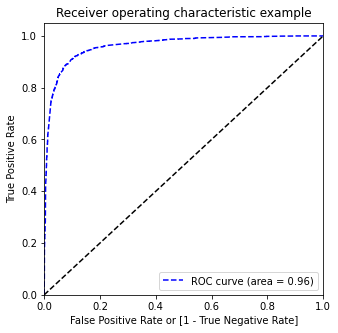

In [117]:
# Deriving values of FPR, TPR and Thresholds using roc_score function available in metrics:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Y Train Pred'], drop_intermediate = False )

# Deriving values of AUC Score using roc_auc_score function available in metrics:
auc_score = metrics.roc_auc_score(y_train_pred_final['Converted'], y_train_pred_final['Y Train Pred'])

# Initializing the plot:
plt.figure(figsize=(5, 5))

# Plotting the ROC curve
plt.plot( fpr, tpr, 'b--', label='ROC curve (area = %0.2f)' % auc_score )

# Plotting the diagonal
plt.plot([0, 1], [0, 1], 'k--')

# Setting aesthetics
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()


<b>Observations:</b>
- ROC curve area is 0.96 with the curve hugging axis showing a robust model that predicts effectively.

- <b>Although all above measurements signify towards a robust model, however, they all are based on assumption of 0.5 to be the threshold value.

- The model has created probabilistic values of target variable prediction and it is a manual process to get optimum results at optimum threshdold value.

- `We will now ascertain the optimal threshold where this model can be improved further`</b>

## Finding Optimal Threshold

In order to find an optimal threshold, we will create a small experiment:
- In this experiment, we will create additional parts in our existing dataframe to derive a proediction of each of the points at various threshold levels (0 to 0.9).
- This will give us the predictions for each of the rows based on other thresholds
- We will then do a columnwise evaluation of each of those thresholds to arrive at the optimum cutoff value based on which we will predict further.

In [118]:
# Creating columns with different probability cutoffs 

# Creating a list of numbers of cutoff values
numbers = [float(x)/10 for x in range(10)]

# Iterative loop
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Y Train Pred'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Y Train Pred,Derived Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.025520,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.832266,1,1,1,1,1,1,1,1,1,1,0
3516,0,0.031106,0,1,0,0,0,0,0,0,0,0,0
8105,0,0.341221,0,1,1,1,1,0,0,0,0,0,0
3934,0,0.844297,1,1,1,1,1,1,1,1,1,1,0


Based on above extension in our dataframe, we will now create a fresh dataframe that shows us the specificity, sensitivity and accuracy alongwith threshold value of each of the above dataframes threshold columns:

In [119]:

# Initializing dataframe
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num= numbers

# Iterative Loop
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.848176,0.962693,0.777611
0.2,0.2,0.885436,0.942417,0.850325
0.3,0.3,0.901515,0.919708,0.890305
0.4,0.4,0.909091,0.888078,0.922039
0.5,0.5,0.909246,0.860908,0.939030
0.6,0.6,0.908936,0.846310,0.947526
0.7,0.7,0.901051,0.809002,0.957771
0.8,0.8,0.891775,0.761557,0.972014
0.9,0.9,0.843074,0.608273,0.987756


Above dataframe shows each of the metric evaluated based on each of the threshold values for our dataset. We will now plot them to obtain the optimum threshold value where the plots will intersect.

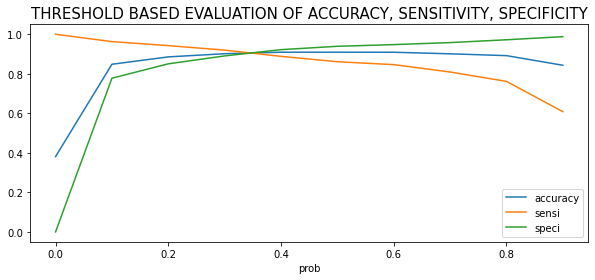

In [120]:
# Plotting using pandas
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize= (10,4))
plt.title('threshold based evaluation of accuracy, sensitivity, specificity'.upper(), fontsize= 15)
plt.show()


<b>0.35 seems to be optimal point where all the three curves converge</b>

We will now extend our dataframe with one more column of 'final_predicted' to update the predictions based on the threshold value of 0.35

#### Checking on Precision Recall Tradeoff

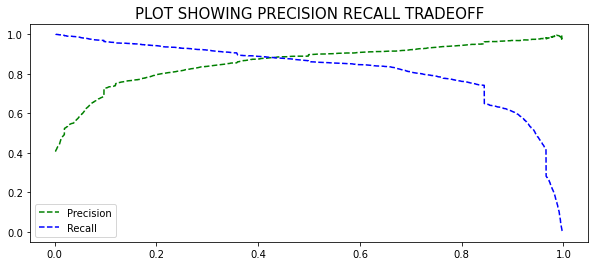

In [121]:
# Precision, Recall and Threshold Values being saved in variables
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Y Train Pred'])

# Defining the figure
plt.figure(figsize= (10,4))

# Plotting Line plots
plt.plot(thresholds, p[:-1], "g--", label= 'Precision')
plt.plot(thresholds, r[:-1], "b--", label= 'Recall')

# Setting final aesthetics
plt.title('plot showing precision recall tradeoff'.upper(), fontsize= 15)

plt.legend()
plt.show()


<b>Observtions:</b>
- Above plot shows the convergence of Precision and Recall on 0.45

<b>NOTE:</b>
- `Our focus here is to care more for our predicting ability of 1 (Converted) and hence, Model Sensitivity and Total Positive Rate will be of heavier concern for us.`
- <b>`Thus, based on earlier plot, we chose to finalize the threshold of 0.35`</b>

In [122]:
# Adding one more column based on predictions b=made on the basis of threshold = 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final['Y Train Pred'].map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()


,Converted,Y Train Pred,Derived Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.025520,0,1,0,0,0,0,0,0,0,0,0,0
6795,0,0.832266,1,1,1,1,1,1,1,1,1,1,0,1
3516,0,0.031106,0,1,0,0,0,0,0,0,0,0,0,0
8105,0,0.341221,0,1,1,1,1,0,0,0,0,0,0,0
3934,0,0.844297,1,1,1,1,1,1,1,1,1,1,0,1


## Rechecking Model Accuracy

In [123]:
# Confusion Matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'] )
confusion2


array([[3623,  379],
       [ 231, 2235]], dtype=int64)

In [124]:
# Initializing variables again:

f_TP = confusion2[1,1] # true positive 
f_TN = confusion2[0,0] # true negatives
f_FP = confusion2[0,1] # false positives
f_FN = confusion2[1,0] # false negatives


In [125]:
print('Model Sensitivity:', round((f_TP/float(f_TP+f_FN))*100, 2), '%')    #Ratio of correctly predicted YES with that of total predicted YES
print('Model Specificity:', round((f_TN/float(f_TN+f_FP))*100, 2), '%')    #Ratio of correctly predicted NO with that of total predicted NO
print('True Positive Rate:', round((f_TP/float(f_TP+f_FN))*100, 2), '%')   #Ratio of correctly predicted YES with that of actual YES
print('False Positive Rate:', round((f_FP/float(f_TN+f_FP))*100, 2), '%')  #Ratio of correctly predicted NO with that of actual NO
print('Precision:', round((f_TP/float(f_TP+f_FP))*100, 2), '%')            #Ratio of correctly predicted YES with actual YES 
print('Recall:', round((f_TP/float(f_TP+f_FN))*100, 2), '%')               #Ratio of correctly predicted YES with all predicted YES

Model Sensitivity: 90.63 %
Model Specificity: 90.53 %
True Positive Rate: 90.63 %
False Positive Rate: 9.47 %
Precision: 85.5 %
Recall: 90.63 %


In [126]:
acc_matrix= pd.DataFrame()
acc_matrix['Accuracy Matrix']= ['Model Sensitivity', 'Model Specificity', 'True Positive Rate', 'False Positive Rate',
                               'Precision', 'Recall']

acc_matrix['Old Measure']= [round((TP/float(TP+FN))*100, 2), round((TN/float(TN+FP)*100), 2),
                            round((TP/float(TP+FN))*100, 2), round((FP/float(TN+FP))*100, 2),
                            round((TP/float(TP+FP))*100, 2), round((TP/float(TP+FN))*100, 2)]

acc_matrix['New Measure']= [round((f_TP/float(f_TP+f_FN))*100, 2), round((f_TN/float(f_TN+f_FP))*100, 2),
                            round((f_TP/float(f_TP+f_FN))*100, 2), round((f_FP/float(f_TN+f_FP))*100, 2),
                            round((f_TP/float(f_TP+f_FP))*100, 2), round((f_TP/float(f_TP+f_FN))*100, 2)]

acc_matrix['Measure Improvement']= acc_matrix['New Measure'] - acc_matrix['Old Measure']
acc_matrix


,Accuracy Matrix,Old Measure,New Measure,Measure Improvement
0,Model Sensitivity,86.09,90.63,4.54
1,Model Specificity,93.90,90.53,-3.37
2,True Positive Rate,86.09,90.63,4.54
3,False Positive Rate,6.10,9.47,3.37
4,Precision,89.69,85.50,-4.19
5,Recall,86.09,90.63,4.54


<b>Observations:</b>
- Reduction in threshold value from 0.5 to 0.35 has resulted in substantial improvement in our model performance. The model is inclined more towards preddicting a correct 1 (Converted) the as compared to that of 0
    - Sensitivity (Ratio of correctly predicted YES with all predicted YES) has gone up by 4.5%
    - Specificity (Ratio of correctly predicted NO against all predicted NO) has decreased by 3.4%

# Predicting Test Set

<b>Uptill now, we have run the model only on Train Data Set and kept our test set hidden from the machine. We will start applying the model on Test set now to asses how better can the model be generalized and is it able to effectively predict on unseen data</b>

## Splitting Test Set in X & y

In [127]:
y_test= leads_test.pop('Converted')
X_test= leads_test

print('y test shape:', y_test.shape)
print('X test shape:', X_test.shape)


y test shape: (2772,)
X test shape: (2772, 66)


## Scaling X Test

Our scaler is already fitted with coefficients of train data set. Hemce we will not fit the data again into it. Instead, we used the same scaler to transform the test data.

In [128]:
X_test[scaler_list]= scaler.transform(X_test[scaler_list])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Activity Index_Unknown,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium,Asymmetrique Profile Index_Unknown
4269,0.031873,0.444982,0.145455,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
2376,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7766,0.019920,0.025968,0.090909,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9199,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4359,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


## Dropping redundant columns from X_test

In [129]:
for i in X_test.columns:
    if i not in X_train_sm.drop(labels= 'const', axis= 1).columns:
        X_test.drop(labels= i, axis= 1, inplace= True)

In [130]:
X_test.shape

(2772, 14)

## Adding Constant

We will need to seperately add the constant to X test so that our statsmodel can interpret the data.

In [131]:
X_test_sm= sm.add_constant(X_test)
X_test_sm.head(2)

,const,Total Time Spent on Website,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_unknown,Specialization_Travel and Tourism,Current Occupation_Undisclosed,Tags_Lost,Tags_Ongoing,Tags_Unable to Reach,Lead Quality_Worst,Asymmetrique Activity Index_Low
4269,1.0,0.444982,0,0,0,0,1,0,0,1,0,0,0,0,0
2376,1.0,0.000000,0,0,0,0,1,1,0,0,0,0,0,0,0


## Predicting on Test Set

In [132]:
y_test_pred= res.predict(X_test_sm)
y_test_pred

4269    0.582646
2376    0.965643
7766    0.685513
9199    0.002212
4359    0.844297
          ...   
8649    0.009474
2152    0.965643
7101    0.000985
5331    0.222226
2960    0.965643
Length: 2772, dtype: float64

In [133]:
# Incorporating values of y test pred in dataframe against actual value

# Initializing Dataframe
y_test_pred_final= pd.DataFrame()

# Updating dataframe
y_test_pred_final['Converted']= y_test
y_test_pred_final['Y Test Pred']= y_test_pred

y_test_pred_final.head()


,Converted,Y Test Pred
4269,1,0.582646
2376,1,0.965643
7766,1,0.685513
9199,0,0.002212
4359,1,0.844297


In [134]:
# Since we have taken our cutoff as 0.35, taking 0.35 as threshold and adding another column of predictions based on this:

y_test_pred_final['Derived Prediction']= y_test_pred_final['Y Test Pred'].map(lambda x: 0 if x <= 0.35 else 1)


In [135]:
# Quick glance of dataframe
y_test_pred_final.head()

,Converted,Y Test Pred,Derived Prediction
4269,1,0.582646,1
2376,1,0.965643,1
7766,1,0.685513,1
9199,0,0.002212,0
4359,1,0.844297,1


## Evaluating Test Set Predictions

Now, since we have the predictions done based on our model trained on trainset, we will evaluate the prediction quality on our test set to asses whether or not the model is able to give us similar accuracy scores as in the case of train set.

In [136]:
# Confusion Matrix:

confusion_test= metrics.confusion_matrix(y_true= y_test_pred_final['Converted'], y_pred= y_test_pred_final['Derived Prediction'])
confusion_test


array([[1508,  169],
       [  88, 1007]], dtype=int64)

In [137]:
# Initializing all 4 variables:

t_TP = confusion_test[1,1] # true positive 
t_TN = confusion_test[0,0] # true negatives
t_FP = confusion_test[0,1] # false positives
t_FN = confusion_test[1,0] # false negatives


In [138]:
print('Model Sensitivity:', round((t_TP/float(t_TP+t_FN))*100, 2), '%')    #Ratio of correctly predicted YES with that of total predicted YES
print('Model Specificity:', round((t_TN/float(t_TN+t_FP))*100, 2), '%')    #Ratio of correctly predicted NO with that of total predicted NO
print('True Positive Rate:', round((t_TP/float(t_TP+t_FN))*100, 2), '%')   #Ratio of correctly predicted YES with that of actual YES
print('False Positive Rate:', round((t_FP/float(t_TN+t_FP))*100, 2), '%')  #Ratio of correctly predicted NO with that of actual NO
print('Precision:', round((t_TP/float(t_TP+t_FP))*100, 2), '%')    
print('Recall:', round((t_TP/float(t_TP+t_FN))*100, 2), '%')

Model Sensitivity: 91.96 %
Model Specificity: 89.92 %
True Positive Rate: 91.96 %
False Positive Rate: 10.08 %
Precision: 85.63 %
Recall: 91.96 %


Incorporating above measurement metrices against the train set measurements to check the difference:

In [139]:
# Initializing Dataframe
train_test_compare= pd.DataFrame()

# Adding Data
train_test_compare['Accuracy Matrix']= ['Model Sensitivity', 'Model Specificity', 'True Positive Rate', 'False Positive Rate',
                               'Precision', 'Recall']

train_test_compare['Trainset Measure']= [round((f_TP/float(f_TP+f_FN))*100, 2), round((f_TN/float(f_TN+f_FP))*100, 2),
                                         round((f_TP/float(f_TP+f_FN))*100, 2), round((f_FP/float(f_TN+f_FP))*100, 2),
                                         round((f_TP/float(f_TP+f_FP))*100, 2), round((f_TP/float(f_TP+f_FN))*100, 2)]

train_test_compare['Testset Measure']= [round((t_TP/float(t_TP+t_FN))*100, 2), round((t_TN/float(t_TN+t_FP))*100, 2), 
                                        round((t_TP/float(t_TP+t_FN))*100, 2), round((t_FP/float(t_TN+t_FP))*100, 2),
                                        round((t_TP/float(t_TP+t_FP))*100, 2), round((t_TP/float(t_TP+t_FN))*100, 2)]

train_test_compare['Measure Difference']= train_test_compare['Testset Measure']-train_test_compare['Trainset Measure']

train_test_compare

,Accuracy Matrix,Trainset Measure,Testset Measure,Measure Difference
0,Model Sensitivity,90.63,91.96,1.33
1,Model Specificity,90.53,89.92,-0.61
2,True Positive Rate,90.63,91.96,1.33
3,False Positive Rate,9.47,10.08,0.61
4,Precision,85.50,85.63,0.13
5,Recall,90.63,91.96,1.33


<b>Observations:</b>
- From above dataframe, we conclude that the difference between the measure between Trainset and Testset is well within 5%.
- The above dataframe also signifies that our model is robust and is capable to be generalized on data (including unseen data) for predictions.

<b>Based on above, we conclude our model to be final model that will be used to assign scores and add a label of 'Hot Leads' to our main dataframe. The 'Hot Leads' shall be classified with:
- Close to 92% Sensitivity
- Close to 90% Specificity
- Close to 92% True Positivity Rate
- Close to 10% False Positivity Rate
- Close to 86% Precision
- Close to 92% Recall</b>

Before assigning Lead Score and Hot Leads label, we will inspect the equation and important variables influencing our model

# Equation for Logistic Regression

In [140]:
# Examining the Parameters:

par= res.params
par


const                                    0.665835
Total Time Spent on Website              4.366432
Lead Origin_Lead Import                 -2.223311
Last Activity_Converted to Lead         -1.223123
Last Activity_Email Bounced             -2.330665
Last Activity_Olark Chat Conversation   -1.696226
Last Activity_SMS Sent                   1.645445
Country_unknown                          1.024717
Specialization_Travel and Tourism       -1.088281
Current Occupation_Undisclosed          -3.920619
Tags_Lost                               -6.105837
Tags_Ongoing                            -4.463260
Tags_Unable to Reach                    -5.333007
Lead Quality_Worst                      -2.506236
Asymmetrique Activity Index_Low         -1.952185
dtype: float64

In [141]:
# Equation of conversion

print(f'Lead Conversion Probability=', round(par.loc['const'], 2), '+')
for i in par.index:
    if i != 'const':
        print('      ', '+', i, 'x (', round(par.loc[i], 2), ')')
        

Lead Conversion Probability= 0.67 +
       + Total Time Spent on Website x ( 4.37 )
       + Lead Origin_Lead Import x ( -2.22 )
       + Last Activity_Converted to Lead x ( -1.22 )
       + Last Activity_Email Bounced x ( -2.33 )
       + Last Activity_Olark Chat Conversation x ( -1.7 )
       + Last Activity_SMS Sent x ( 1.65 )
       + Country_unknown x ( 1.02 )
       + Specialization_Travel and Tourism x ( -1.09 )
       + Current Occupation_Undisclosed x ( -3.92 )
       + Tags_Lost x ( -6.11 )
       + Tags_Ongoing x ( -4.46 )
       + Tags_Unable to Reach x ( -5.33 )
       + Lead Quality_Worst x ( -2.51 )
       + Asymmetrique Activity Index_Low x ( -1.95 )


## Important Features

In [142]:
# Initialize dataframe
par_df= pd.DataFrame(par)

# Setting index and column names
par_df= par_df.reset_index()
par_df.columns= ['Feature', 'Influence']

# Sorting dataframe based on absolute value
par_df= par_df.sort_values(by= 'Influence', key= abs, ascending = False)

par_df

,Feature,Influence
10,Tags_Lost,-6.105837
12,Tags_Unable to Reach,-5.333007
11,Tags_Ongoing,-4.463260
1,Total Time Spent on Website,4.366432
9,Current Occupation_Undisclosed,-3.920619
13,Lead Quality_Worst,-2.506236
4,Last Activity_Email Bounced,-2.330665
2,Lead Origin_Lead Import,-2.223311
14,Asymmetrique Activity Index_Low,-1.952185
5,Last Activity_Olark Chat Conversation,-1.696226


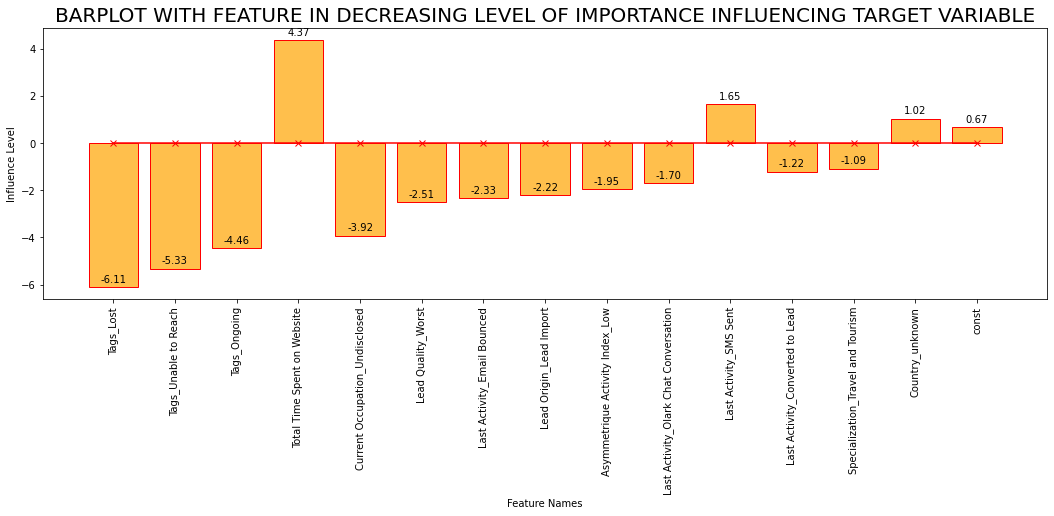

In [143]:
# Defining Figure
plt.figure(figsize= (18, 5))

# Plotting the bargraph
plots= plt.bar(x= par_df['Feature'], height= par_df['Influence'], color= (1, 0.647, 0, 0.7), edgecolor= 'red')

# Iterative Loop for Annotations
for bar in plots.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Plot for zero line
plt.plot([0 for i in range(len(par_df['Feature']))], 'r-x')

# Setting aesthetics
plt.title('barplot with feature in decreasing level of importance influencing target variable'.upper(), fontsize= 20, y= 1)
plt.ylabel('Influence Level')
plt.xlabel('Feature Names')
plt.xticks(rotation= 90)

plt.show()


<b>Observations:</b>
- Highest dependence of conversion rates observed on Tags followed by total time spent on website
- Since data in tags feature was engineered from our end, the results interpretation shall accordingly vary
    - Interpretation of Tags_Lost includes categories: 'Diploma holder (Not Eligible)', 'Not doing further education', 'Already a student', 'University not recognized', 'Recognition issue (DEC approval)', 'Lost to Others'
    - Interpretation of Tags_Unable to reach includes: 'Busy', 'opp hangup', 'Ringing', 'switched off', 'invalid number', 'number not provided', 'wrong number given'
    - Interpretation of Tags_Ongoing includes: 'Shall take in the next coming month', 'Want to take admission but has financial problems', 'in touch with EINS', 'In confusion whether part time or DLP', 'Still Thinking', 'Graduation in progress', Interested in full time MBA', 'Interested in other courses'

# Incorporating Lead Score and Hot leads label to original dataset

Preparing a deep copy of Leads dataset:

In [144]:
leads1= leads.copy(deep= True)

## Preparing dataset with same characteristics as Train and Test

In [145]:
leads1.head(1)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current Occupation,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index
0,660737,API,Chat,0,0.0,0,0.0,Page Visited on Website,unknown,Undisclosed,Unemployed,Ongoing,Low in Relevance,Medium,Medium


## Scaling the variables

In [146]:
leads1[scaler_list]= scaler.transform(leads1[scaler_list])
leads1.head(1)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current Occupation,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index
0,660737,API,Chat,0,0.0,0.0,0.0,Page Visited on Website,unknown,Undisclosed,Unemployed,Ongoing,Low in Relevance,Medium,Medium


## Dummy Variable Creation

In [147]:
# Creating a list of features to be converted to dummy variable:
dummy_list= list(leads1.select_dtypes(include= 'object').columns)

# Creating Dummies:

for i in dummy_list:
    
    # Creating dummies and storing in my_d
    my_d= pd.get_dummies(data= leads1[i], drop_first= True, prefix_sep= '_', prefix= i)
    
    # Concatanating with leads_ml
    leads1= pd.concat([leads1, my_d], axis= 1).drop(labels= i, axis= 1)

leads1.head(2)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Activity Index_Unknown,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium,Asymmetrique Profile Index_Unknown
0,660737,0,0.00000,0.000000,0.000000,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,660728,0,0.01992,0.296655,0.045455,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


## Dropping Redundant Columns

In [148]:
for i in leads1.columns:
    if i not in X_train_sm.drop(labels= 'const', axis= 1).columns:
        leads1.drop(labels= i, axis= 1, inplace= True)
        
leads1.head(1)


,Total Time Spent on Website,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_unknown,Specialization_Travel and Tourism,Current Occupation_Undisclosed,Tags_Lost,Tags_Ongoing,Tags_Unable to Reach,Lead Quality_Worst,Asymmetrique Activity Index_Low
0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0


## Assigning Lead Score (Between 0 and 1)

In [149]:
# Saving predictions in a new variable
lead_score= res.predict(sm.add_constant(leads1))

# Adding new column of Lead Score:
leads['Lead Score']= lead_score

# Multiplying lead score with 100 to get values between 0 and 100
leads['Lead Score']= leads['Lead Score'].apply(lambda x: int(x*100))

# Inspecting dataframe
leads.head()


,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current Occupation,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,Lead Score
0,660737,API,Chat,0,0.0,0,0.0,Page Visited on Website,unknown,Undisclosed,Unemployed,Ongoing,Low in Relevance,Medium,Medium,5
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Undisclosed,Unemployed,Unable to Reach,Not Sure,Medium,Medium,3
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Closed,Might be,Medium,High,97
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Unable to Reach,Not Sure,Medium,High,1
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Undisclosed,Unemployed,Closed,Might be,Medium,High,89


We have succefully incorporated the Lead Score.

We will now add one more column that contains lead conversion probability. The lead conversion probability column will be named 'Conversion Scope' and will have following category levels:
- Hot Lead: Where lead score > 80
- Warm Lead: Where 70 < lead score <= 80
- Medium Lead: Where 50 < lead score <= 70
- Cold Lead: Where 30 < lead score <= 50 
- Dormant Lead: Where lead score <= 30

In [150]:
# Defining function for above Conversion Scopes:

def conv_scope(number):
    if number > 80:
        return 'Hot Lead'
    elif 70 < number <= 80:
        return 'Warm Lead'
    elif 50 < number <= 70:
        return 'Medium Lead'
    elif 30 < number <= 50:
        return 'Cold Lead'
    else:
        return 'Dormant Lead'

In [151]:

# Incorporating Conversion Scope based on above defined function
leads['Conversion Scope']= leads['Lead Score'].apply(conv_scope)


In [152]:

# Inspecting the dataframe
leads.head()


,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current Occupation,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,Lead Score,Conversion Scope
0,660737,API,Chat,0,0.0,0,0.0,Page Visited on Website,unknown,Undisclosed,Unemployed,Ongoing,Low in Relevance,Medium,Medium,5,Dormant Lead
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Undisclosed,Unemployed,Unable to Reach,Not Sure,Medium,Medium,3,Dormant Lead
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Closed,Might be,Medium,High,97,Hot Lead
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Unable to Reach,Not Sure,Medium,High,1,Dormant Lead
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Undisclosed,Unemployed,Closed,Might be,Medium,High,89,Hot Lead


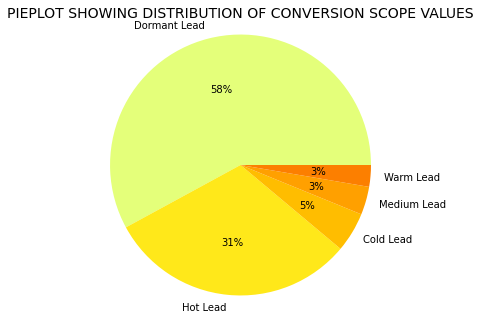

In [153]:
# Inspecting the column using a pie plot:

# Plotting using pieplot in Pandas
leads['Conversion Scope'].value_counts().plot.pie(autopct= '%.0f%%', cmap= 'Wistia', radius= 1.5)

# Setting aesthetics:
plt.title('pieplot showing distribution of Conversion scope values'.upper(), y= 1.15, fontsize= 14)
plt.ylabel('')

plt.show()


<b>Observations:</b>
- 31% of given leads are Hot
- Further higher conversion benchmarks are from Warm Leads and Medium Leads (Each at 3%)
- We have 5% cold leads and 58% Dormant Leads

<b>Checking on conversion rates based on Conversion Scopes</b>

In [154]:
# Preparing dataframe to plot
lead_score_comparative= pd.DataFrame(leads.groupby(by= 'Conversion Scope').mean())[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Score']]
lead_score_comparative= lead_score_comparative.sort_values(by= 'Lead Score', ascending= False)
lead_score_comparative


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Score
Conversion Scope,,,,,
Hot Lead,0.948270,3.310031,758.516603,2.198976,93.523244
Warm Lead,0.669355,5.463710,595.375000,3.220968,75.415323
Medium Lead,0.621118,4.695652,765.462733,3.214814,62.854037
Cold Lead,0.434211,2.964912,705.276316,2.113465,39.410088
Dormant Lead,0.053054,3.378293,302.723333,2.371338,5.045208


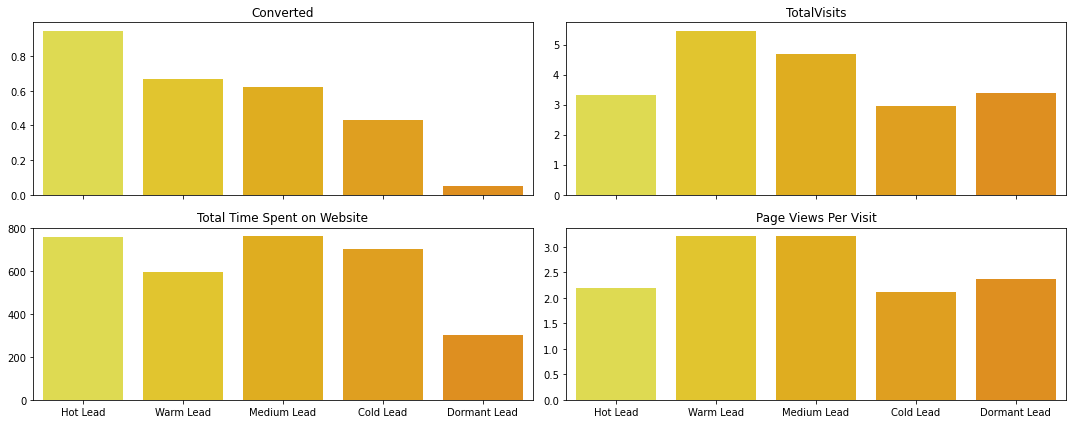

In [155]:
# Defining grid
fig, ax= plt.subplots(nrows= 2, ncols= 2, figsize= (15,6), sharex= True)

# Initializing variable for iteration
i=0

# Interative Loop
for j in range(2):
    for k in range(2):

        if i < 4:
            
            # Barplot making
            sns.barplot(x= lead_score_comparative.index, 
                        y= lead_score_comparative[lead_score_comparative.columns[i]], ax= ax[j, k],
                       palette= 'Wistia')
            
            # Setting aesthetics
            ax[j,k].set_title(lead_score_comparative.columns[i])
            ax[j,k].set_ylabel('')
            ax[j,k].set_xlabel('')
            

        i+=1

plt.tight_layout()
plt.show()


<b>Observations:</b>
- Highest conversion ratio is for hot leads followed by Warm leads followed by Medium Leads and cold leads. Conversion rates in Dormant are almost negligible.

# Business Recommendations

<b>PRIMARY RECOMMENDATIONS</b>

<b>`Company should have maximum focus on Hot Leads followed by Warm, Medium, Cold and Dormant Leads in given order of importance and as pre availability of resources.`</b>
- Hence, during the time when they dont have resources, it is advisable to allocate maximum resources on calling people characterised as Hot Leads. 
- In case the hot leads are exausted, then they can start to call Warm leads
- Ones they are exausted, calling should be done on Medium leads. The difference between conversion rates of Warm leads and Medium leads is negligible.
- Post exausting all these, callers can start focussing on Cold leads.
- It is advisable to avoid calling leads that have been defined as Dormant. These leads have negligible conversion rate of around 5%. These leads also make up close to 60% of the total leads obtained. Ignoring them may will result in heavy savings on resource allocation.

<b>ADDITIONAL OPERATIONAL SUGGESTIONS AND RECOMMENDATIONS</b>

- Tags have surfaced as the most influential feature inversely proportional to the probability of lead conversion. Within Tags, post transformation, we conclude that:

- ‘Tags_Lost’, ‘Tags_Unable to Reach’,  ‘Tags_Ongoing’ are top categories in Tags for a lead NOT being converted.

- Based on above insights, Tags with following categories in original dataset could largely be least prioritized: ‘Diploma holder (Not Eligible)’, 'Not doing further education’, 'Already a student’,  'University not recognized', 'Recognition issue (DEC approval)', 'Lost to Others’, 'Busy', 'opp hangup', 'Ringing', 'switched off', 'invalid number', 'number not provided’, ‘Wrong number given’, 'Shall take in the next coming month', 'Want to take admission but has financial problems’,  'in touch with EINS', 'In confusion whether part time or DLP', 'Still Thinking’,  'Graduation in progress', 'Interested in full time MBA', 'Interested in other courses’

- Since considerable number of tags are associated with ‘Unable to Reach’ category, recurrence of such instances can be reduced by making contact number as mandatory field and possibly an OTP verification can be done to ensure that genuine number is shared. For OTP verification service, further research will be needed to asses comparison between savings in resource cost and OTP verification service cost.

- Since Total time spent on the website is directly proportional to probability of lead conversion, it is advisable for sales people to start assessing and documenting this factor in real time basis so that they can prioritize on lead focus. An integrated sales force automation solution can be a possible recommendation based on firm’s financial position and projected increase in revenue and profitability.

- Current Occupation comes up as yet another category which has surfaced as one of the influential features. When occupation status is undisclosed/ Unknown/ Null Value, the probability of lead NOT being converted is relatively higher. This could possibly be because of non serious students just trying to casually check the products. Recurrence of such leads could be reduced by: 
  - Making it mandatory for students to share their official mail ID and authenticating it with an OTP. This solution has to be well thought through since this could possibly be a problem for employees of some of the organizations where Email usage policies are strict.
  - Increasing the size of Institutional Sales Team that handles B2B business

- Leads with Lead Quality as Worse can be completely avoided. Out analysis also showed that leads with quality index of ‘Worse’ is miniscule at just 7% success ratio.

- Sales team is recommended to prioritize leads with relatively higher Asymmetrique Activity Score

# xx End of Notebook xx